# Data Preparation

## Import Dataset

In [ ]:
# Default
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taufikyasirs/marketing_campaign_marketektive/master/marketing_campaign.csv',delimiter=';')
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
440,5012,1989,Graduation,Married,28691.0,1,0,2013-07-04,56,5,...,8,0,0,0,0,0,0,3,11,0
1955,6428,1950,PhD,Widow,76842.0,0,0,2014-05-03,37,605,...,0,0,0,0,0,0,0,3,11,0
1684,10323,1952,Graduation,Married,49413.0,0,1,2013-10-25,88,205,...,5,0,0,0,0,0,0,3,11,0
1670,8143,1985,PhD,Single,37929.0,0,0,2013-07-30,49,202,...,7,0,1,0,1,0,0,3,11,1
1222,1627,1957,2n Cycle,Divorced,77297.0,0,0,2013-01-26,84,408,...,4,0,0,0,1,0,0,3,11,0


## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. Dataset terdiri dari 29 columns dan 2240 rows data
2. Variasi tipe data yang ada pada dataset adalah int64, object, float64
Pada kolom Income memiliki 2216 rows nilai non-null dari keseluruhan 2240 rows yang berarti terdapat 24 nilai null / missing values sedangkan untuk kolom lainya jumlah rows non-null sama dengan keseluruhan rows data yang ada
3. Type data keseluruhan sudah tidak mengalami masalah hanya sebaiknya pada data Dt_customer yang isinya berkaitan dengan waktu dan tanggal ada baiknya dijadikan ke tipe Datetime saja



### Missing Value

### Null Value

In [ ]:
# Find Null Values
counts = df.isna().sum().sort_values(ascending = False)

# Percentage Null Values
percents = round(df.isna().mean() * 100, 2).sort_values(ascending = False)

null = pd.concat([counts, percents], axis = 1, keys = ['null_counts', '%'])
null

,null_counts,%
Income,24,1.07
ID,0,0.00
NumDealsPurchases,0,0.00
Z_Revenue,0,0.00
Z_CostContact,0,0.00
Complain,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00


In [ ]:
# Percentage rows containing missing values
df_nan = df[df.isna().any(axis = 1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df) * 100, 2)} %')

Persentase missing value pada dataset : 1.07 %


Summary

1. Pada column Income terdapat 24 nilai Null atau sekitar 1%, karena nilainya < 10% maka dilakukan handling nilai Null

### Merging Column Same Value

In [ ]:
df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single', inplace=True)
df['Education'].replace('2n Cycle', 'Master', inplace=True)

Summary
1. Pada column Marital_Status terdapat value Alone, YOLO, dan Absurd yang diasusmsikan sama dengan Single maka untuk value tersebut di lakukan perubahan menjadi Single.
2. Pada column Education terdapat 2n Cycle dan Master yang sebenarnya setara maka untuk value 2n Cycle di lakukan perubahan menjadi Master.

### Data Duplicate

In [ ]:
df.duplicated().any()

False

Summary
1. Pengecekan duplicate dilakukan berdasarkan ID untuk mengetahui apakah data ganda berdasarkan ID customer, setelah dilakukan pengecekan didapatkan hasil bahwa tidak ada duplicate sehingga tidak dilakukan handling duplicate.

### Data Split

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
num = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

cat = ['Education', 'Marital_Status', 'Dt_Customer']

### Statistics Descriptive

In [ ]:
# Statistic Numerical Data
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Summary:
1.

In [ ]:
# Statistic Categorical Data
df[cat].describe().T

,count,unique,top,freq
Education,2240,4,Graduation,1127
Marital_Status,2240,5,Married,864
Dt_Customer,2240,663,2012-08-31,12


In [ ]:
# Persentage
print(f'% Graduation      : {round(1127/2240*100, 2)}')
print(f'% Married         : {round(864/2240*100, 2)}')
print(f'% 2012-08-31	  : {round(12/2240*100, 2)}')

% Graduation      : 50.31
% Married         : 38.57
% 2012-08-31	  : 0.54


Summary:
1.

## Univariate Analysis

### Feature Numarical Analysis

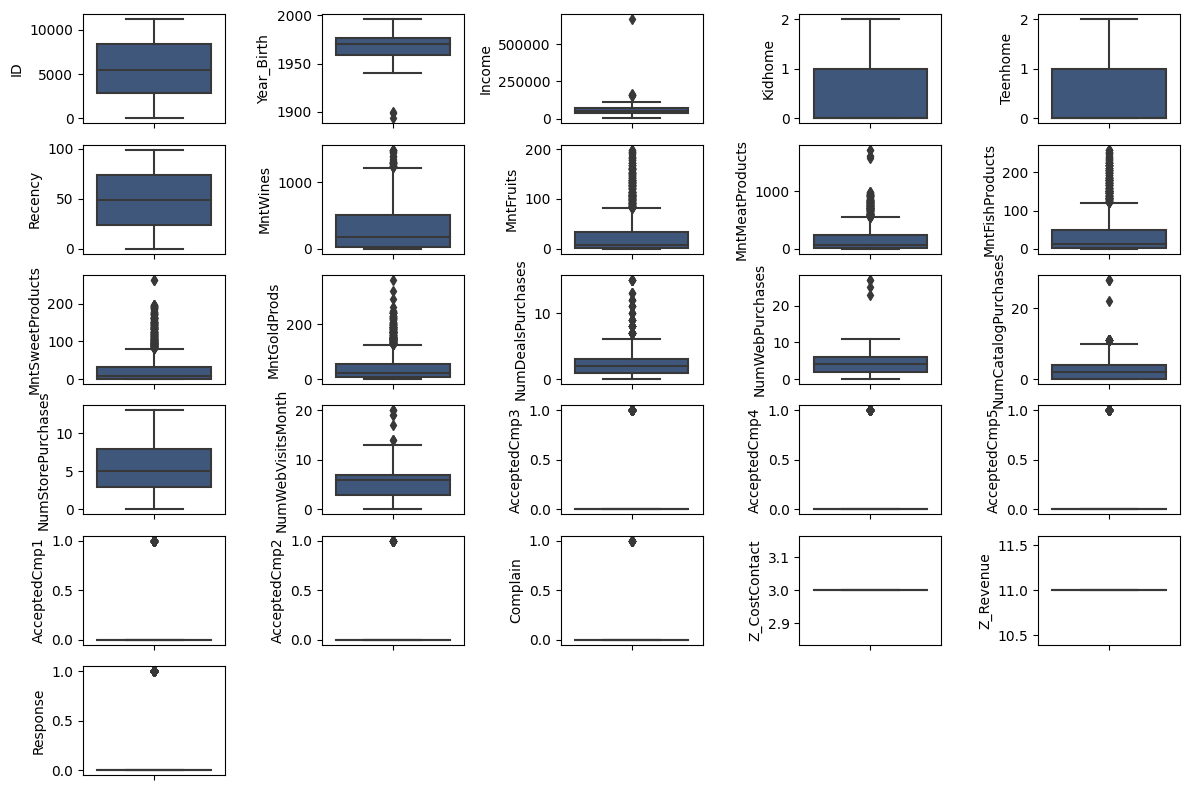

In [ ]:
# Distribution and Outlier Checking with Boxplot

plt.figure(figsize = (12, 8))
for i in range(0, len(num)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y = df[num[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

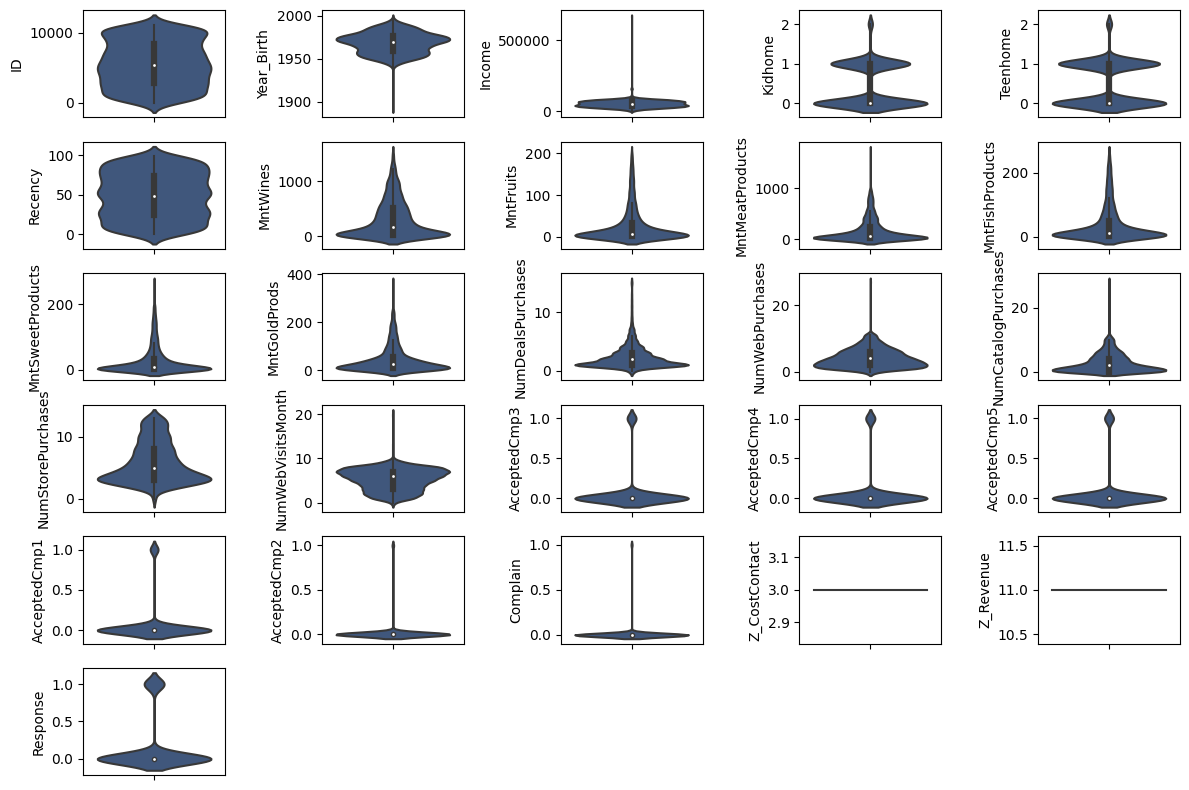

In [ ]:
# Distribution and Outlier Checking with Violinplot

plt.figure(figsize = (12, 8))
for i in range(0, len(num)):
    plt.subplot(6, 5, i+1)
    sns.violinplot(y = df[num[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

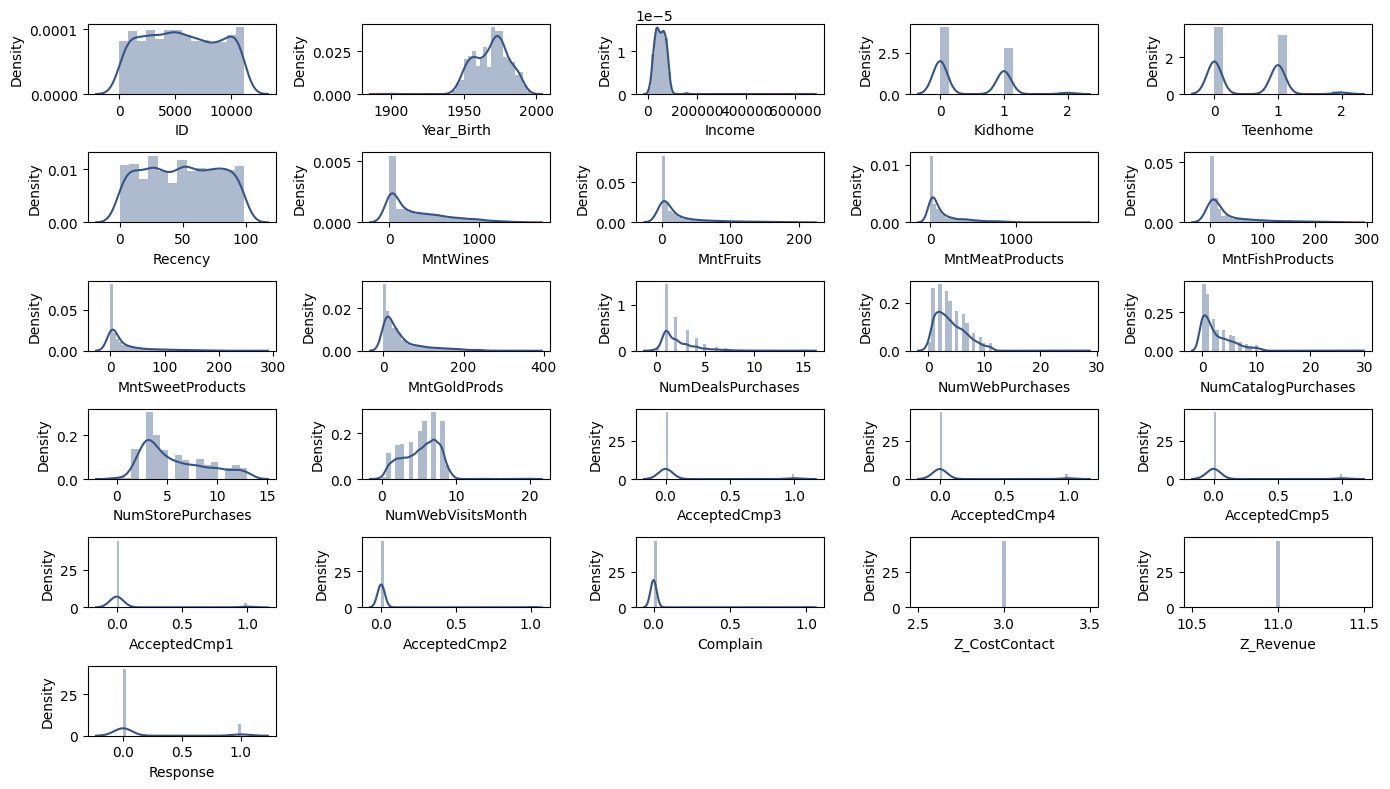

In [ ]:
# Distribution and Outlier Checking with Distplot

plt.figure(figsize = (14, 8))
for i in range(0, len(num)):
    plt.subplot(6, 5, i+1)
    sns.distplot(df[num[i]], color = '#365486')
    plt.tight_layout()

### Feature Categorical Analysis

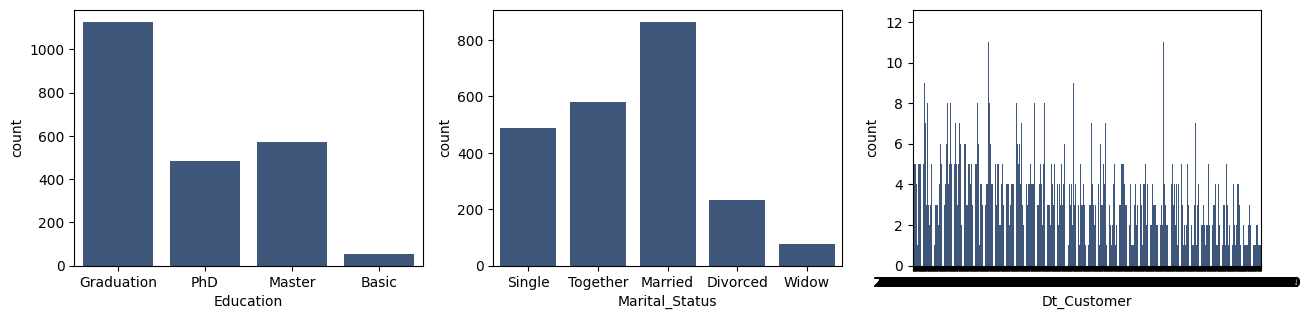

In [ ]:
# Distribution and Outlier Checking with Countplot

plt.figure(figsize = (17, 6))
for i in range(0, len(cat)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x = df[cat[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

Tidak terlalu banyak insight yang didapatkan, sehingga diputuskan untuk membuat visualisasi top 10 untuk Dt_Customer

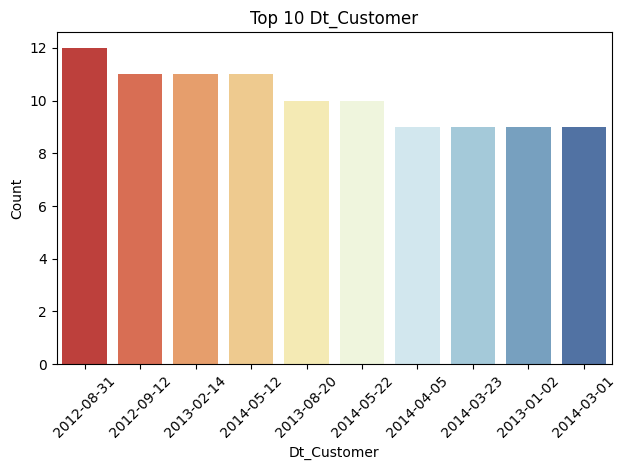

In [ ]:
# Taking top 10 Dt_Customer
dt_customer_t10 = df['Dt_Customer'].value_counts().head(10)
# Making Barchart
sns.barplot(x = dt_customer_t10.index, y = dt_customer_t10.values, palette = ('RdYlBu'))

plt.xlabel('Dt_Customer')
plt.ylabel('Count')
plt.title('Top 10 Dt_Customer')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi Dt_Customer per tahun

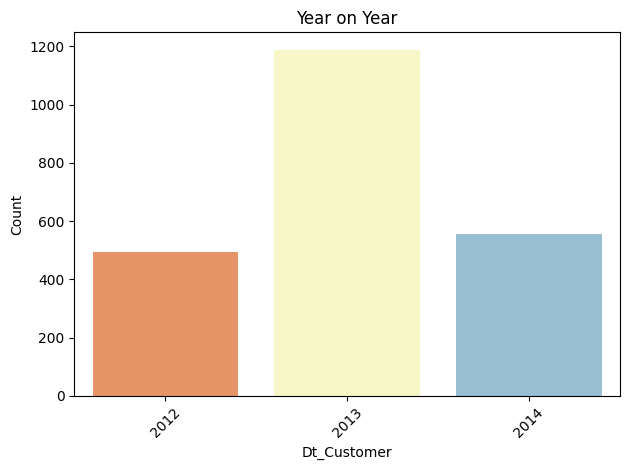

In [ ]:
# Dt_Customer Bar
# Change datatype of Dt_Customer
dc = pd.to_datetime(df['Dt_Customer']).dt.year
# Making Barchart
sns.countplot(x = dc, palette = ('RdYlBu'))

plt.xlabel('Dt_Customer')
plt.ylabel('Count')
plt.title('Year on Year')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusion
1.

## Multivariate Analysis

<Axes: >

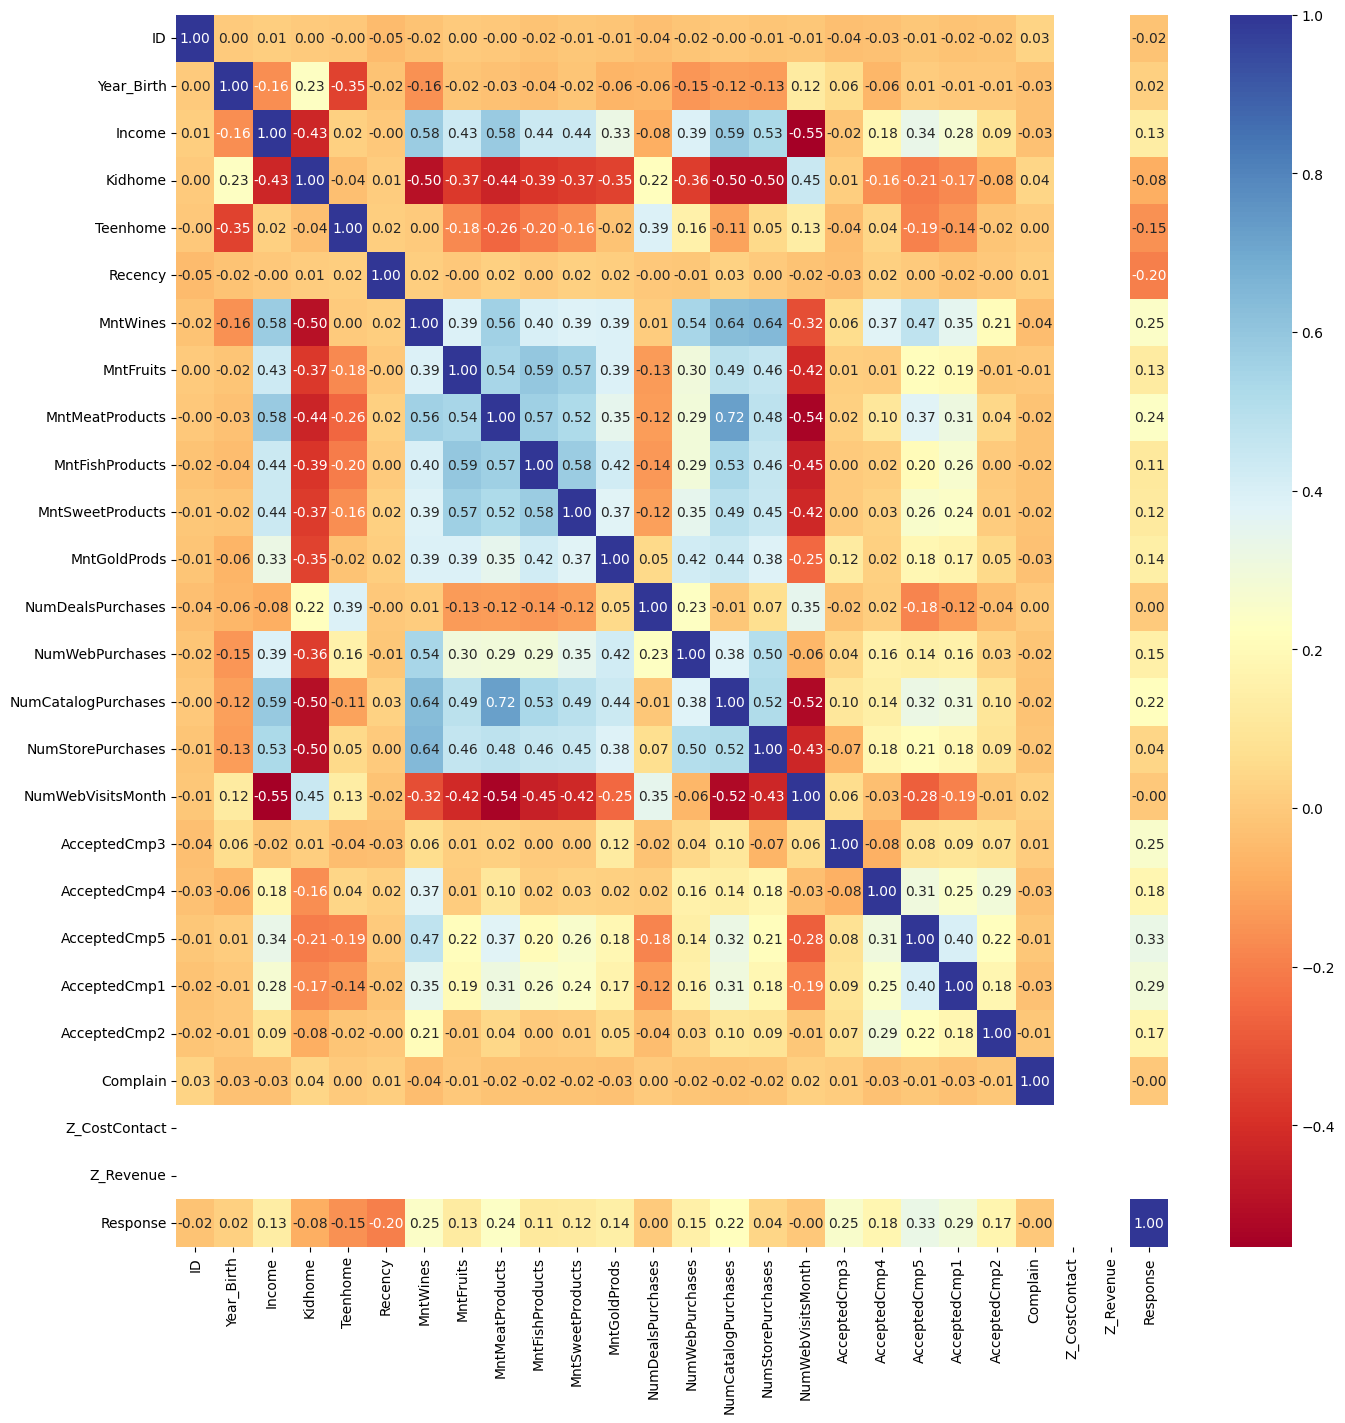

In [ ]:
# Heatmap Num Correlation
plt.figure(figsize=(16, 16))
sns.heatmap(df[num].corr(), cmap='RdYlBu', annot=True, fmt='.2f')

### Conclusion
Feature yang memiliki korelasi tinggi :

1.

In [ ]:
# Heatmap Num Correlation
from scipy.stats import chi2_contingency

def cat_vs_resp(column):
    resp_by = df.groupby(column)['Response'].value_counts(normalize = True).to_frame()
    resp_by.columns = ['Proportion']
    resp_by_pvt = resp_by.reset_index().pivot(columns = 'Response', index = column, values = 'Proportion')
    display(resp_by_pvt * 100)

    contingency = df.groupby([column, 'Response']).agg({'Response': 'count'}).rename(columns={'Response': 'count'}).reset_index().pivot(index = column, columns = 'Response', values = 'count')
    stats, p, dof, expected = chi2_contingency(contingency)
    if p < 0.5:
        print(f'Column {column} has a strong relationship with the Response Label.')
    else:
        print(f'Column {column} has a weak relationship with the Response Label.')

    resp_by_pvt.plot(kind = 'bar', stacked = True, ylabel = 'Proportion')
    plt.title(f'Response Proportion by {column}')
    plt.show()


Response,0,1
Education,,
Basic,96.296296,3.703704
Graduation,86.512866,13.487134
Master,86.212914,13.787086
PhD,79.218107,20.781893


Column Education has a strong relationship with the Response Label.


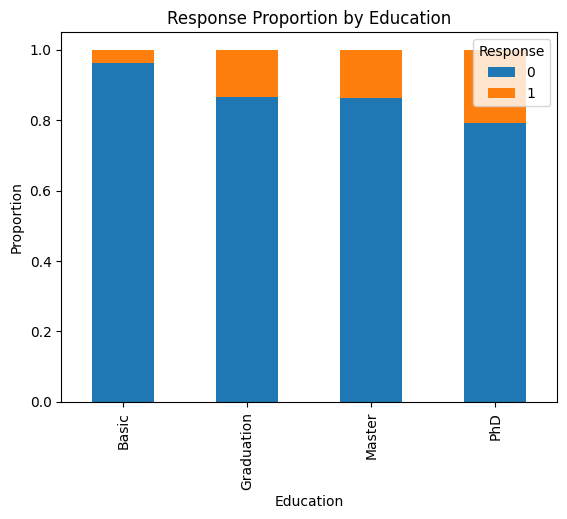

Response,0,1
Marital_Status,,
Divorced,79.310345,20.689655
Married,88.657407,11.342593
Single,77.618070,22.381930
Together,89.655172,10.344828
Widow,75.324675,24.675325


Column Marital_Status has a strong relationship with the Response Label.


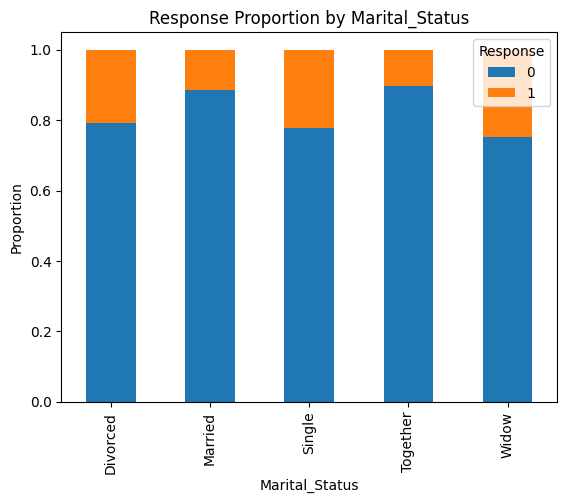

Response,0,1
Dt_Customer,,
2012-07-30,NaN,100.0
2012-07-31,100.0,NaN
2012-08-01,50.0,50.0
2012-08-02,100.0,NaN
2012-08-03,80.0,20.0
...,...,...
2014-06-25,100.0,NaN
2014-06-26,100.0,NaN
2014-06-27,100.0,NaN


Column Dt_Customer has a weak relationship with the Response Label.


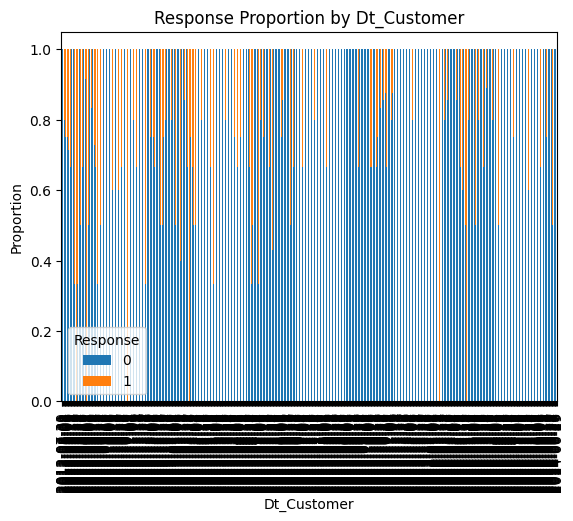

In [ ]:
for col in df[cat]:
    cat_vs_resp(col)

Summary

1. Column kategori (Marital_Status, Education, Favorite_Product, 2nd_Favorite_Product) dilakukan pengecekan korelasi terhadap target(Response) untuk mengetahui apakah kategori tersebut perlu dilakukan features encoding atau tidak.
2. Algoritma pengecekan korelasi yang digunakan adalah chi2_contingency, berdasarkan hasil pengecekan ternyata data kategori memiliki korelasi yang kuat terhadap target (Response) sehingga perlu dilakukan features Encoding.
3.  Features encoding dilakukan supaya permodelan mechine learning nantinya dapat belajar data yang lebih banyak, features encoding yang dilakukan menggunakan metode One Hot Encoding.

# Feature Engineering

## Data Cleansing

### Change Datatype

In [ ]:
# Modify Data Type Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Add New Column

In [ ]:
# Add Year Column
df['Membership_Age'] = 2014 - df['Dt_Customer'].dt.year

# Create Age Column
df['Customer_Age'] = 2014 - df['Year_Birth']

# Create Total Campaign Column
df['Ratio_Acceptance'] = (((df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']) / 5) * 100)

# Create Total Purchase Column
df['Frequency_Online_Purchase'] = df['NumCatalogPurchases'] + df['NumWebPurchases']
df['Frequency_Offline_Purchase'] = df['NumStorePurchases']
df['Frequency_Promo_Purchase'] = df['NumDealsPurchases']

# Create Total Expense Column
df['Consumable_Expenses'] = df['MntWines'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts']
df['Non_Consumable_Expenses'] = df['MntGoldProds']

# Mengambil hanya kolom produk
produk_columns = df.columns[df.columns.str.startswith('Mnt')]
df['Favorite_Product'] = df[produk_columns].idxmax(axis=1)
df['2nd_Favorite_Product'] = df[produk_columns].apply(lambda row: row.nlargest(2).index[1], axis=1)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,2,57,0.0,18,4,3,1529,88,MntWines,MntMeatProducts
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,60,0.0,2,2,2,21,6,MntWines,MntMeatProducts
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,49,0.0,10,10,1,734,42,MntWines,MntMeatProducts
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,30,0.0,2,4,2,48,5,MntMeatProducts,MntWines
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,33,0.0,8,6,5,407,15,MntWines,MntMeatProducts


### Drop Column

In [ ]:
df = df.drop(['ID', 'Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
              'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',
              'MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntGoldProds'], axis=1)
df.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
52,Graduation,Single,35790.0,1,0,54,7,0,3,11,...,1,37,0.0,2,3,2,69,3,MntFishProducts,MntMeatProducts
210,Graduation,Together,46097.0,0,1,11,4,0,3,11,...,1,58,0.0,4,6,5,233,8,MntWines,MntMeatProducts
2236,PhD,Together,64014.0,2,1,56,7,0,3,11,...,0,68,20.0,10,5,7,436,8,MntWines,MntMeatProducts
567,Master,Together,29298.0,1,1,60,5,0,3,11,...,1,63,0.0,1,2,1,10,1,MntWines,MntMeatProducts
1791,PhD,Single,48918.0,1,1,21,4,0,3,11,...,0,51,0.0,1,4,2,61,1,MntWines,MntMeatProducts


### Handling Missing Value

In [ ]:
df.isna().sum()

Education                      0
Marital_Status                 0
Income                        24
Kidhome                        0
Teenhome                       0
Recency                        0
NumWebVisitsMonth              0
Complain                       0
Z_CostContact                  0
Z_Revenue                      0
Response                       0
Membership_Age                 0
Customer_Age                   0
Ratio_Acceptance               0
Frequency_Online_Purchase      0
Frequency_Offline_Purchase     0
Frequency_Promo_Purchase       0
Consumable_Expenses            0
Non_Consumable_Expenses        0
Favorite_Product               0
2nd_Favorite_Product           0
dtype: int64

In [ ]:
# Percentage record containing missing value
df_nan = df[df.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df)*100, 2)}%')

Persentase missing value pada dataset : 1.07%


In [ ]:
# Handling Missing Value
df_prep = df.dropna()

In [ ]:
# Check Missing Value
df_prep.isna().sum()

Education                     0
Marital_Status                0
Income                        0
Kidhome                       0
Teenhome                      0
Recency                       0
NumWebVisitsMonth             0
Complain                      0
Z_CostContact                 0
Z_Revenue                     0
Response                      0
Membership_Age                0
Customer_Age                  0
Ratio_Acceptance              0
Frequency_Online_Purchase     0
Frequency_Offline_Purchase    0
Frequency_Promo_Purchase      0
Consumable_Expenses           0
Non_Consumable_Expenses       0
Favorite_Product              0
2nd_Favorite_Product          0
dtype: int64

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   2216 non-null   object 
 1   Marital_Status              2216 non-null   object 
 2   Income                      2216 non-null   float64
 3   Kidhome                     2216 non-null   int64  
 4   Teenhome                    2216 non-null   int64  
 5   Recency                     2216 non-null   int64  
 6   NumWebVisitsMonth           2216 non-null   int64  
 7   Complain                    2216 non-null   int64  
 8   Z_CostContact               2216 non-null   int64  
 9   Z_Revenue                   2216 non-null   int64  
 10  Response                    2216 non-null   int64  
 11  Membership_Age              2216 non-null   int64  
 12  Customer_Age                2216 non-null   int64  
 13  Ratio_Acceptance            2216 

## Features Encoding

In [ ]:
df_prep.sample(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
11,Basic,Married,7500.0,0,0,59,8,0,3,11,...,2,38,0.0,2,3,1,45,16,MntFruits,MntGoldProds
1909,Master,Married,31535.0,1,0,95,7,0,3,11,...,1,34,20.0,2,2,1,32,19,MntGoldProds,MntWines
172,Graduation,Married,50447.0,2,0,4,6,0,3,11,...,0,44,0.0,4,3,1,121,27,MntWines,MntGoldProds
627,Graduation,Together,70971.0,0,1,28,7,0,3,11,...,2,54,0.0,22,5,7,1808,17,MntWines,MntMeatProducts
1859,Graduation,Together,54006.0,1,0,42,7,0,3,11,...,2,29,0.0,9,7,2,484,97,MntMeatProducts,MntWines


### One Hot Encoding

In [ ]:
df_edu = pd.get_dummies(df_prep['Education'], prefix='Edu')

df_prep = pd.concat([df_prep, df_edu], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('Education', axis=1)

df_prep.head()

,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,...,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD
0,Single,58138.0,0,0,58,7,0,3,11,1,...,4,3,1529,88,MntWines,MntMeatProducts,0,1,0,0
1,Single,46344.0,1,1,38,5,0,3,11,0,...,2,2,21,6,MntWines,MntMeatProducts,0,1,0,0
2,Together,71613.0,0,0,26,4,0,3,11,0,...,10,1,734,42,MntWines,MntMeatProducts,0,1,0,0
3,Together,26646.0,1,0,26,6,0,3,11,0,...,4,2,48,5,MntMeatProducts,MntWines,0,1,0,0
4,Married,58293.0,1,0,94,5,0,3,11,0,...,6,5,407,15,MntWines,MntMeatProducts,0,0,0,1


In [ ]:
df_MS = pd.get_dummies(df_prep['Marital_Status'], prefix='MS')

df_prep = pd.concat([df_prep, df_MS], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('Marital_Status', axis=1)

df_prep.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,2nd_Favorite_Product,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,58138.0,0,0,58,7,0,3,11,1,2,...,MntMeatProducts,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,5,0,3,11,0,0,...,MntMeatProducts,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,4,0,3,11,0,1,...,MntMeatProducts,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,6,0,3,11,0,0,...,MntWines,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,5,0,3,11,0,0,...,MntMeatProducts,0,0,0,1,0,1,0,0,0


In [ ]:
df_FP = pd.get_dummies(df_prep['Favorite_Product'], prefix='Fav_Prod')

df_prep = pd.concat([df_prep, df_FP], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('Favorite_Product', axis=1)

df_prep.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,MS_Married,MS_Single,MS_Together,MS_Widow,Fav_Prod_MntFishProducts,Fav_Prod_MntFruits,Fav_Prod_MntGoldProds,Fav_Prod_MntMeatProducts,Fav_Prod_MntSweetProducts,Fav_Prod_MntWines
0,58138.0,0,0,58,7,0,3,11,1,2,...,0,1,0,0,0,0,0,0,0,1
1,46344.0,1,1,38,5,0,3,11,0,0,...,0,1,0,0,0,0,0,0,0,1
2,71613.0,0,0,26,4,0,3,11,0,1,...,0,0,1,0,0,0,0,0,0,1
3,26646.0,1,0,26,6,0,3,11,0,0,...,0,0,1,0,0,0,0,1,0,0
4,58293.0,1,0,94,5,0,3,11,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_ndFP = pd.get_dummies(df_prep['2nd_Favorite_Product'], prefix='ndFav_Prod')

df_prep = pd.concat([df_prep, df_ndFP], axis=1)

# Drop the original 'Education' column if needed
df_prep = df_prep.drop('2nd_Favorite_Product', axis=1)

df_prep.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Membership_Age,...,Fav_Prod_MntGoldProds,Fav_Prod_MntMeatProducts,Fav_Prod_MntSweetProducts,Fav_Prod_MntWines,ndFav_Prod_MntFishProducts,ndFav_Prod_MntFruits,ndFav_Prod_MntGoldProds,ndFav_Prod_MntMeatProducts,ndFav_Prod_MntSweetProducts,ndFav_Prod_MntWines
0,58138.0,0,0,58,7,0,3,11,1,2,...,0,0,0,1,0,0,0,1,0,0
1,46344.0,1,1,38,5,0,3,11,0,0,...,0,0,0,1,0,0,0,1,0,0
2,71613.0,0,0,26,4,0,3,11,0,1,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,6,0,3,11,0,0,...,0,1,0,0,0,0,0,0,0,1
4,58293.0,1,0,94,5,0,3,11,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2216 non-null   float64
 1   Kidhome                      2216 non-null   int64  
 2   Teenhome                     2216 non-null   int64  
 3   Recency                      2216 non-null   int64  
 4   NumWebVisitsMonth            2216 non-null   int64  
 5   Complain                     2216 non-null   int64  
 6   Z_CostContact                2216 non-null   int64  
 7   Z_Revenue                    2216 non-null   int64  
 8   Response                     2216 non-null   int64  
 9   Membership_Age               2216 non-null   int64  
 10  Customer_Age                 2216 non-null   int64  
 11  Ratio_Acceptance             2216 non-null   float64
 12  Frequency_Online_Purchase    2216 non-null   int64  
 13  Frequency_Offline_

Summary

1. Column kategori (Marital_Status, Education, Favorite_Product, 2nd_Favorite_Product) dilakukan pengecekan korelasi terhadap target(Response) untuk mengetahui apakah kategori tersebut perlu dilakukan features encoding atau tidak.
2. Algoritma pengecekan korelasi yang digunakan adalah chi2_contingency, berdasarkan hasil pengecekan ternyata data kategori memiliki korelasi yang kuat terhadap target (Response) sehingga perlu dilakukan features Encoding.
3.  Features encoding dilakukan supaya permodelan mechine learning nantinya dapat belajar data yang lebih banyak, features encoding yang dilakukan menggunakan metode One Hot Encoding.

# Spliting

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_cleanedd is your dataframe
X = df_prep.drop(['Response','Z_CostContact', 'Z_Revenue'], axis = 1)
y = df_prep['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:

X_train = len(X_train)
y_train = len(y_train)
X_test = len(X_test)
y_test = len(y_test)

print(len(X))
print(X_train)
print(y_train)
print(X_test)
print(y_test)

2216
1551
1551
665
665


## Handling Outlier

In [ ]:
print(f'Jumlah baris sebelum handling outlier: {len(X_train)}')

# Handling outliers in X_train and y_train
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)

# Create new DataFrame for X_train and Series for y_train after handling outliers
X_train_cleaned = X_train[outlier_mask]
y_train_cleaned = y_train[outlier_mask]

print(f'Jumlah baris setelah handling outlier (X_train): {len(X_train_cleaned)}')
print(f'Jumlah baris setelah handling outlier (y_train): {len(y_train_cleaned)}')

Jumlah baris sebelum handling outlier: 1551
Jumlah baris setelah handling outlier (X_train): 164
Jumlah baris setelah handling outlier (y_train): 164


## Standarization train

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

## Random Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    'SVM': SVC(kernel = 'linear', random_state = 42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
}

# Initialize lists to store results
model_names = []
train_precision_scores = []
test_precision_scores = []
precision_differences = []

# Iterate through models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Train precision
    y_train_pred = model.predict(X_train)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')

    # Test precision
    y_test_pred = model.predict(X_test)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')

    # Calculate difference precision
    precision_difference = round(abs(test_precision - train_precision), 3)
    # Append results to lists
    model_names.append(model_name)
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)
    precision_differences.append(precision_difference)

# Create a DataFrame
precision_df = pd.DataFrame({
    'Model': model_names,
    'Train Precision': train_precision_scores,
    'Test Precision': test_precision_scores,
    'Precision Difference' : precision_differences
})

# Sort the DataFrame based on the precision difference
precision_df = precision_df.sort_values(by='Precision Difference')

# Display the sorted DataFrame
precision_df



,Model,Train Precision,Test Precision,Precision Difference
0,Logistic Regression,0.896011,0.871669,0.024
2,SVM,0.898520,0.870971,0.028
3,Naive Bayes,0.846954,0.818919,0.028
1,K-Nearest Neighbors,0.890750,0.823774,0.067
5,Random Forest,0.982524,0.830859,0.152
4,Decision Tree,0.993601,0.841062,0.153


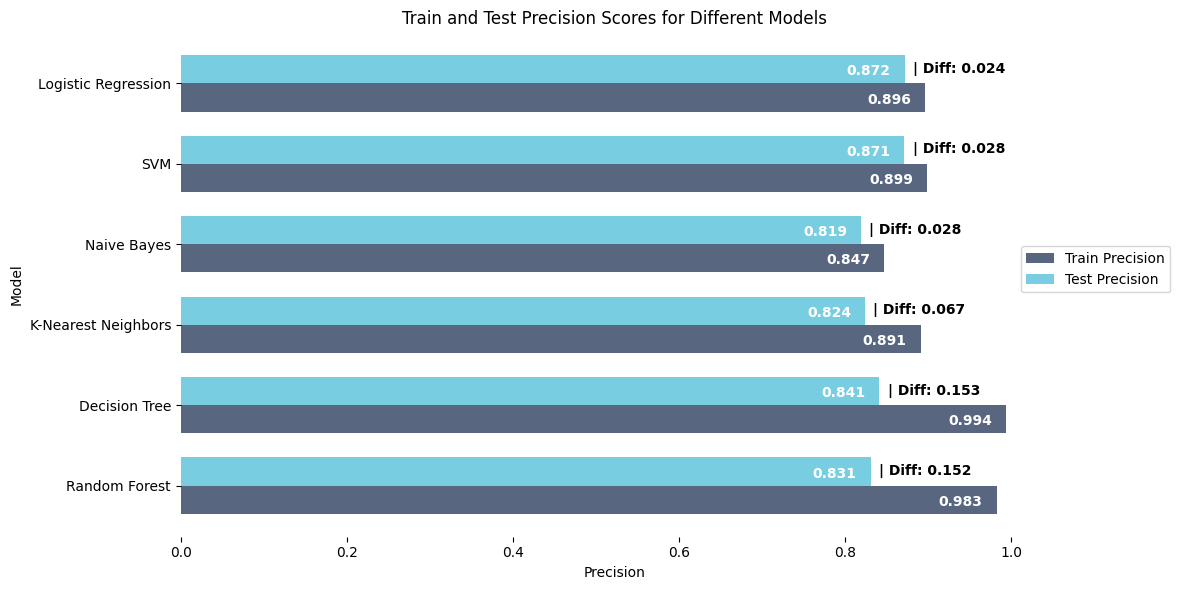

In [ ]:
# Set the desired order manually
desired_order = ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'Naive Bayes', 'SVM', 'Logistic Regression']

# Set the figure size
plt.figure(figsize=(12, 6))

# Map the desired order to a categorical data type to maintain order in the plot
precision_df['Model'] = pd.Categorical(precision_df['Model'], categories=desired_order, ordered=True)

# Sort the DataFrame based on the desired order
precision_df = precision_df.sort_values('Model')

# Plotting the horizontal bar chart with Train and Test Precision as hue
bar_height = 0.35
models = precision_df['Model']

bar_positions_train = np.arange(len(models))
bar_positions_test = bar_positions_train + bar_height

plt.barh(bar_positions_train, precision_df['Train Precision'], height=bar_height, label='Train Precision', color='#11254A', alpha=0.7)
plt.barh(bar_positions_test, precision_df['Test Precision'], height=bar_height, label='Test Precision', color='#41B8D5', alpha=0.7)

# Adding labels and title
plt.ylabel('Model')
plt.xlabel('Precision')
plt.title('Train and Test Precision Scores for Different Models')
plt.yticks(bar_positions_train + bar_height / 2, models)
plt.legend()

# Adding precision values on the right of each bar
for i, (train_precision, test_precision, precision_diff) in enumerate(zip(precision_df['Train Precision'], precision_df['Test Precision'], precision_df['Precision Difference'])):
    plt.text(train_precision - 0.07, (bar_positions_train[i] + bar_height / 2) - 0.2, f'{train_precision:.3f}', ha='left', va='center', color='white', weight='bold')
    plt.text(test_precision - 0.07, (bar_positions_test[i] + bar_height / 2) - 0.2, f'{test_precision:.3f}', ha='left', va='center', color='white', weight='bold')

    # Display the Precision Difference with a vertical line before it
    plt.text(test_precision + 0.01, (bar_positions_test[i] + bar_height / 2) - 0.17, f'| Diff: {precision_diff:.3f}', ha='left', va='center', color='black', weight='bold')

# Modify Grid and Spines
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')

# Set the legend position
plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.53))

# Show the plot
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Initialize lists to store results
model_names = []
train_precision_scores_bt = []
test_precision_scores_bt = []
precision_differences_bt = []

train_precision_scores_at = []
test_precision_scores_at = []
precision_differences_at = []

# Iterate through models
for model_name, model in models.items():
    # Train the model before tuning
    model.fit(X_train, y_train)

    # Train precision before tuning
    y_train_pred_bt = model.predict(X_train)
    train_precision_bt = precision_score(y_train, y_train_pred_bt, average='weighted')

    # Test precision before tuning
    y_test_pred_bt = model.predict(X_test)
    test_precision_bt = precision_score(y_test, y_test_pred_bt, average='weighted')

    # Calculate difference precision before tuning
    precision_difference_bt = round(abs(test_precision_bt - train_precision_bt), 3)

    # Hyperparameter Tuning
    if model_name == 'Logistic Regression':
        penalty = ['l1', 'l2']
        C = [float(x) for x in np.linspace(0.0005, 0.05, 100)]
        hyperparameters = dict(penalty=penalty, C=C)
        logreg = LogisticRegression()
        rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
        rs.fit(X_train, y_train)

        # Get the best Logistic Regression model after tuning
        best_logreg = rs.best_estimator_

        # Train precision after tuning
        y_train_pred_at = best_logreg.predict(X_train)
        train_precision_at = precision_score(y_train, y_train_pred_at, average='weighted')

        # Test precision after tuning
        y_test_pred_at = best_logreg.predict(X_test)
        test_precision_at = precision_score(y_test, y_test_pred_at, average='weighted')

        # Calculate difference precision after tuning
        precision_difference_at = round(abs(test_precision_at - train_precision_at), 3)

    else:
        # Define the parameter distributions to search
        param_grid = {'C': [1, 10, 100],
                      'gamma': [0.0005, 0.005, 0.01, 0.1],
                      'kernel': ['linear', 'rbf', 'poly']}

        # Create an SVM classifier
        svm = SVC(random_state=42)
        grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_svm = grid_search.best_estimator_

        # Train precision after tuning
        y_train_pred_at = best_svm.predict(X_train)
        train_precision_at = precision_score(y_train, y_train_pred_at, average='weighted')

        # Test precision after tuning
        y_test_pred_at = best_svm.predict(X_test)
        test_precision_at = precision_score(y_test, y_test_pred_at, average='weighted')

        # Calculate difference precision after tuning
        precision_difference_at = round(abs(test_precision_at - train_precision_at), 3)

    # Append results
    model_names.append(model_name)
    train_precision_scores_bt.append(train_precision_bt)
    test_precision_scores_bt.append(test_precision_bt)
    precision_differences_bt.append(precision_difference_bt)
    train_precision_scores_at.append(train_precision_at)
    test_precision_scores_at.append(test_precision_at)
    precision_differences_at.append(precision_difference_at)


# Create a DataFrame
precision_df = pd.DataFrame({
    'Model': model_names,
    'Train Precision Before Tuning': train_precision_scores_bt,
    'Test Precision Before Tuning': test_precision_scores_bt,
    'Precision Difference Before Tuning': precision_differences_bt,
    'Train Precision After Tuning': train_precision_scores_at,
    'Test Precision After Tuning': test_precision_scores_at,
    'Precision Difference After Tuning': precision_differences_at
})

precision_df

,Model,Train Precision Before Tuning,Test Precision Before Tuning,Precision Difference Before Tuning,Train Precision After Tuning,Test Precision After Tuning,Precision Difference After Tuning
0,Logistic Regression,0.896011,0.871669,0.024,0.894998,0.870256,0.025
1,SVM,0.898520,0.870971,0.028,0.896673,0.870971,0.026


# Cross Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score

# Assuming df_cleanedd is your dataframe
X = df_prep.drop(['Response','Z_CostContact', 'Z_Revenue'], axis=1)
y = df_prep['Response']

# Set up the StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assuming rs is your RandomizedSearchCV instance for Logistic Regression
rs.fit(X, y)

# Access coefficients from the best estimator
best_logreg = rs.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_logreg, X, y, cv=cv, scoring='precision_weighted')

# Display the number of samples in each class for cross-validation
print(f'Number of samples in each class for cross-validation: {cv.get_n_splits()}')

# Create a DataFrame to store the cross-validation scores
cv_df = pd.DataFrame({'Model': ['Logistic Regression'] * len(cv_scores), 'Precision': cv_scores})

# Reset the index (removes the existing index)
cv_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
cv_df

Number of samples in each class for cross-validation: 5


,Model,Precision
0,Logistic Regression,0.837517
1,Logistic Regression,0.840189
2,Logistic Regression,0.856706
3,Logistic Regression,0.852565
4,Logistic Regression,0.878781


# Feature Importance

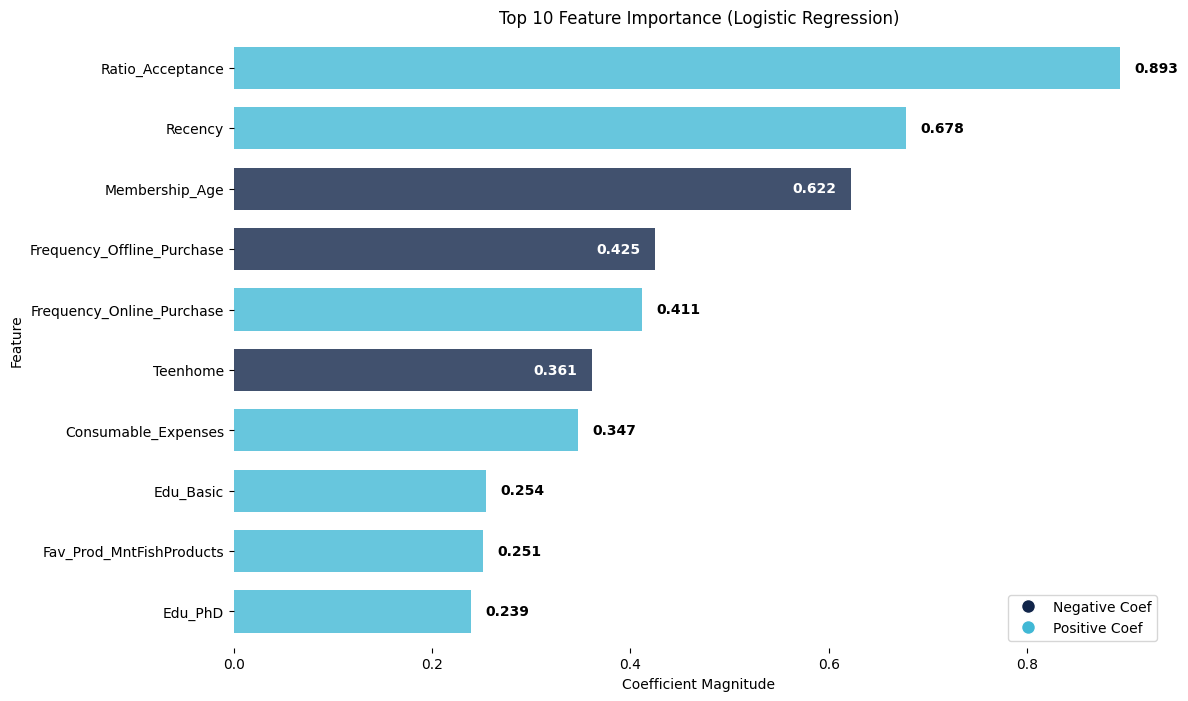

In [ ]:
from matplotlib.lines import Line2D

def show_feature_importance_logreg(rs, X, top_n=10):
    # Access coefficients from the best estimator
    best_logreg = rs.best_estimator_
    coef = best_logreg.coef_[0]

    # Create a pandas Series with feature importances
    feat_importances = pd.Series(coef, index=X.columns)

    # Set up color palette
    color_palette = ['#11254A' if c < 0 else '#41B8D5' for c in coef]

    # Plot the top features with adjusted width and alpha
    ax = feat_importances.abs().nlargest(top_n).plot(kind='barh', figsize=(12, 8), color=color_palette, width=0.7, alpha=0.8)
    ax.invert_yaxis()

    # Adding labels and title
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance (Logistic Regression)')

    # Adding coefficient values on each bar
    for i, value in enumerate(feat_importances.abs().nlargest(top_n)):
        if coef[i] >= 0:
            plt.text(value + 0.015, i, f'{value:.3f}', ha='left', va='center', color='black', weight='bold')
        else:
            plt.text(value - 0.015, i, f'{value:.3f}', ha='right', va='center', color='white', weight='bold')


    # Creating legend elements
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#11254A', markersize=10, label='Negative Coef'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='#41B8D5', markersize=10, label='Positive Coef')]

    # Adding legend
    ax.legend(handles=legend_elements, loc='lower right')

# Modify Grid and Spines
plt.grid(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')

# Assuming X is your feature matrix
show_feature_importance_logreg(rs, X)
plt.show()



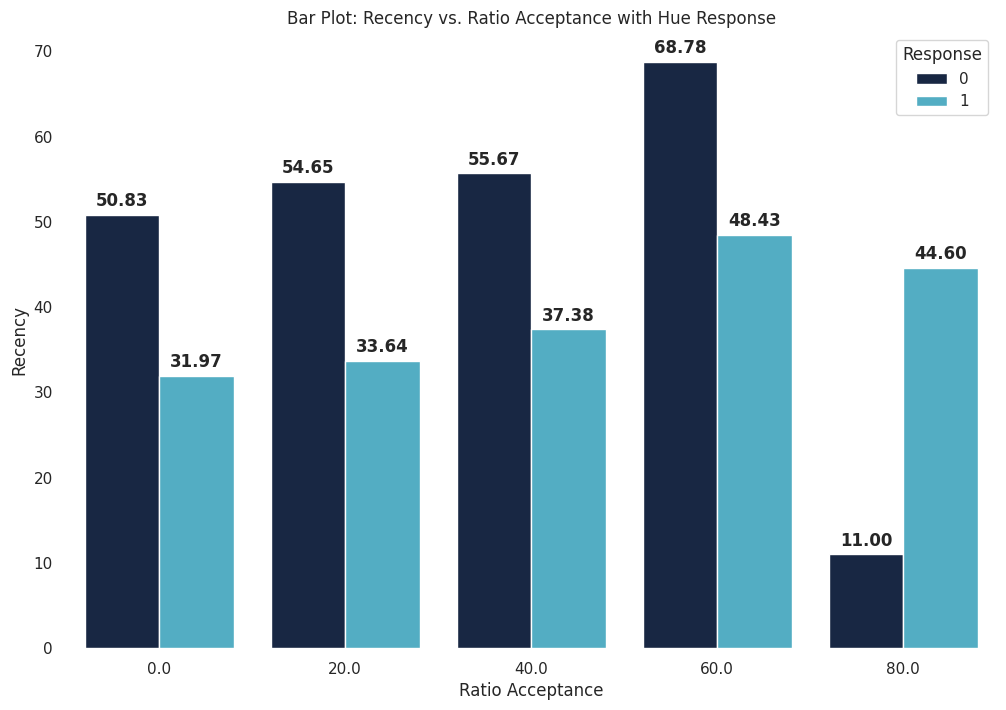

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Setting Color Bar Plot
custom_color = {
    0: '#11254A',  # Color for Response = 0
    1: '#41B8D5',  # Color for Response = 1
}

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Ratio_Acceptance', y='Recency', hue='Response', data=df_prep, palette=custom_color, errorbar=None)

# Add labels and title
plt.xlabel('Ratio Acceptance')
plt.ylabel('Recency')
plt.title('Bar Plot: Recency vs. Ratio Acceptance with Hue Response')

# Modifying Grid
plt.grid(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Adding values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight = 'bold')

# Showing plot
plt.show()


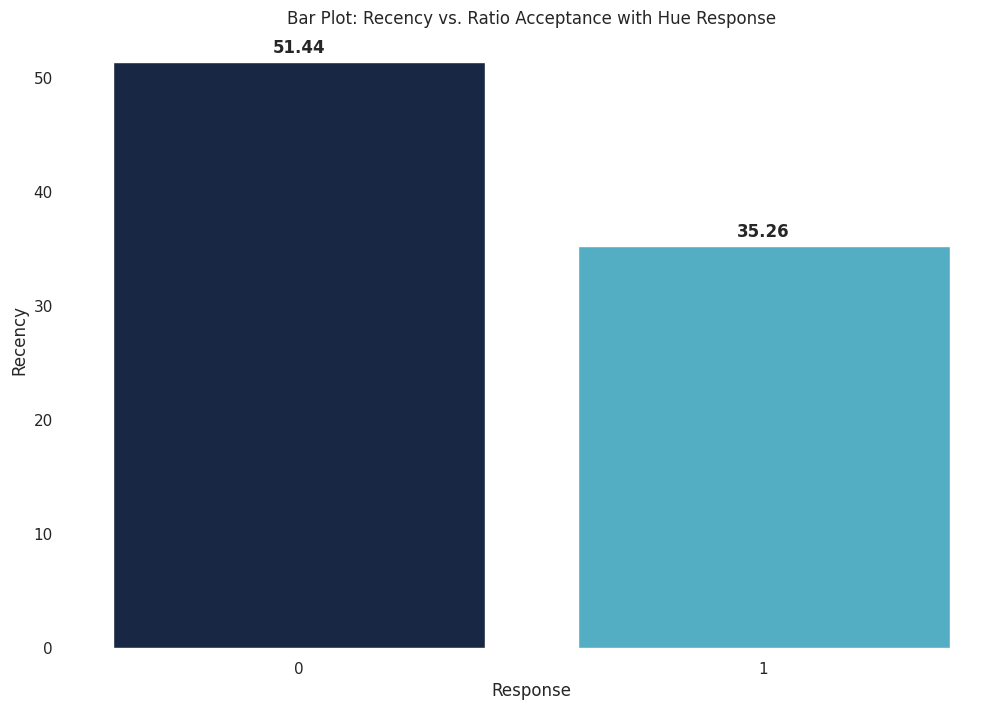

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define custom colors for Response categories
custom_color = {
    0: '#11254A',  # Color for Response = 0
    1: '#41B8D5',  # Color for Response = 1
}

# Create the bar plot with custom colors
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Response', y='Recency', data=df_prep, palette=custom_color, errorbar=None)

# Add labels and title
plt.xlabel('Response')
plt.ylabel('Recency')
plt.title('Bar Plot: Recency vs. Ratio Acceptance with Hue Response')

# Modifying Grid
plt.grid(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Adding values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

# Showing plot
plt.show()


# Data Visualization

In [ ]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,2,57,0.0,18,4,3,1529,88,MntWines,MntMeatProducts


## Proportion Response

In [ ]:
resp = df.copy()
resp = resp.groupby('Response')['ID'].count().reset_index()
resp

,Response,ID
0,0,1906
1,1,334


In [ ]:
total_count = resp['ID'].sum()
resp['Ratio %'] = (resp['ID'] / total_count) * 100

round(resp, 2)

,Response,ID,Ratio %
0,0,1906,85.09
1,1,334,14.91


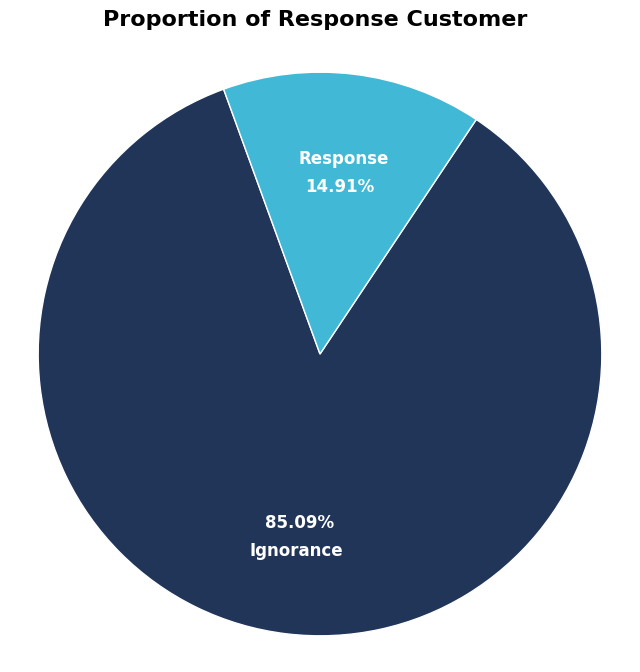

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'Ignorance' : '#213559',
    'Response'  : '#41B8D5'
}

# Replace numeric labels with corresponding strings
resp['Response'] = resp['Response'].replace({0: 'Ignorance', 1: 'Response'})

# Plotting the pie chart
sns.set(style='whitegrid')
plt.figure(figsize=(8, 8))
pie, _, autotexts = plt.pie(resp['Ratio %'],
                            labels = resp['Response'],
                            labeldistance = 0.7,
                            textprops = {'fontsize': 12, 'weight': 'bold', 'color' : 'white', 'ha': 'center', 'va': 'center'},
                            autopct = '%1.2f%%',
                            colors = [custom_color[class_] for class_ in resp['Response']],
                            startangle = 110)


# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Modifying Title
title = 'Proportion of Response Customer'
plt.title(title,
          fontsize = 16,
          loc = 'left',
          pad = 15,
          color = 'black',
          weight = 'bold',
          x = 0.15)

# Display the chart
plt.show()

## Ignorance

In [ ]:
# Filtering Ignorance
ignore = df.copy()
ignore = ignore[ignore['Response'] == 0]
ignore.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,60,0.0,2,2,2,21,6,MntWines,MntMeatProducts
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,49,0.0,10,10,1,734,42,MntWines,MntMeatProducts
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,30,0.0,2,4,2,48,5,MntMeatProducts,MntWines
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,33,0.0,8,6,5,407,15,MntWines,MntMeatProducts
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,1,47,0.0,10,10,2,702,14,MntWines,MntMeatProducts


In [ ]:
ignore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 1 to 2238
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          1906 non-null   int64         
 1   Year_Birth                  1906 non-null   int64         
 2   Education                   1906 non-null   object        
 3   Marital_Status              1906 non-null   object        
 4   Income                      1883 non-null   float64       
 5   Kidhome                     1906 non-null   int64         
 6   Teenhome                    1906 non-null   int64         
 7   Dt_Customer                 1906 non-null   datetime64[ns]
 8   Recency                     1906 non-null   int64         
 9   MntWines                    1906 non-null   int64         
 10  MntFruits                   1906 non-null   int64         
 11  MntMeatProducts             1906 non-null   int64       

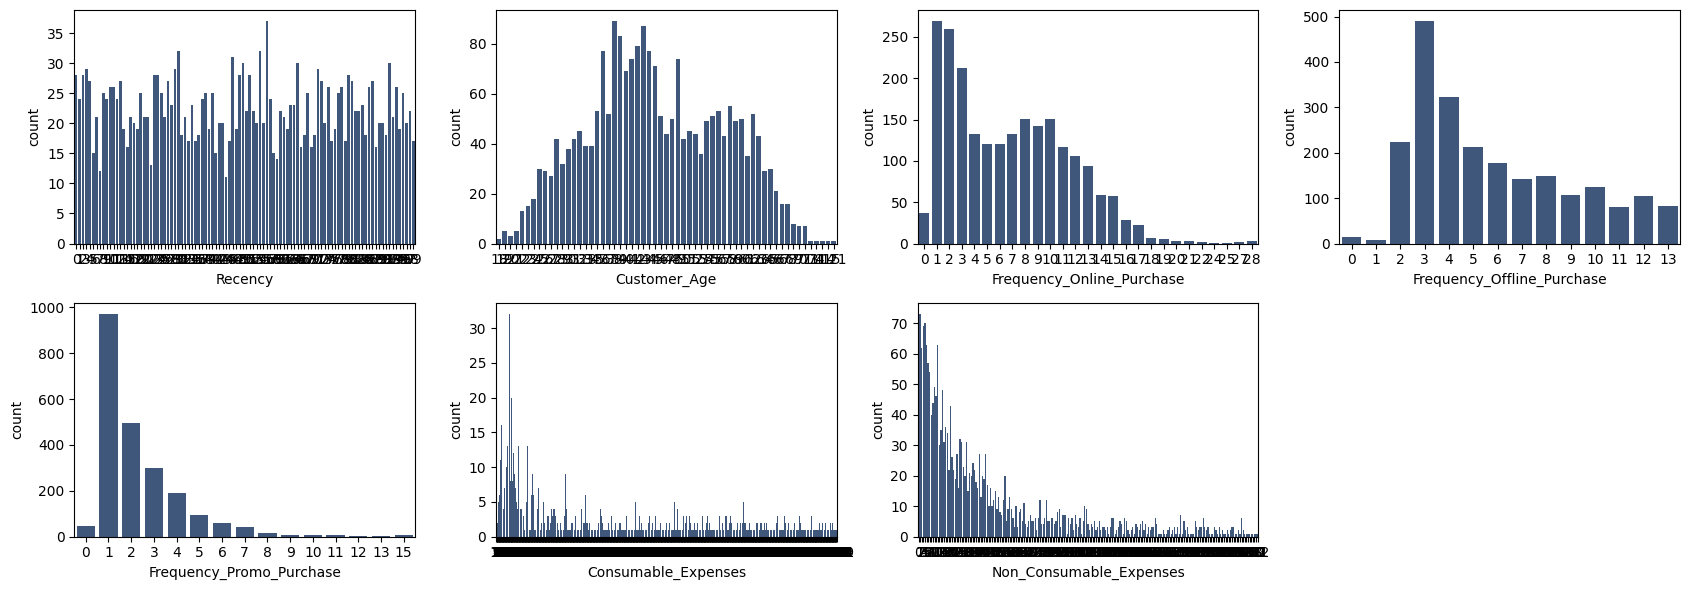

In [ ]:
# Distribution with Countplot
cat = ['Recency', 'Customer_Age', 'Frequency_Online_Purchase', 'Frequency_Offline_Purchase',
       'Frequency_Promo_Purchase', 'Consumable_Expenses', 'Non_Consumable_Expenses']

plt.figure(figsize = (17, 6))
for i in range(0, len(cat)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x = df[cat[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

### Ignorance by Education

In [ ]:
edu = ignore.groupby('Education')['ID'].count().reset_index()
edu

,Education,ID
0,Basic,52
1,Graduation,975
2,Master,494
3,PhD,385


In [ ]:
total_count = edu['ID'].sum()
edu['Ratio %'] = (edu['ID'] / total_count) * 100

edu = edu.sort_values(by = 'Ratio %', ascending=False)
edu = edu.reset_index(drop = True)

round(edu, 2)

,Education,ID,Ratio %
0,Graduation,975,51.15
1,Master,494,25.92
2,PhD,385,20.20
3,Basic,52,2.73


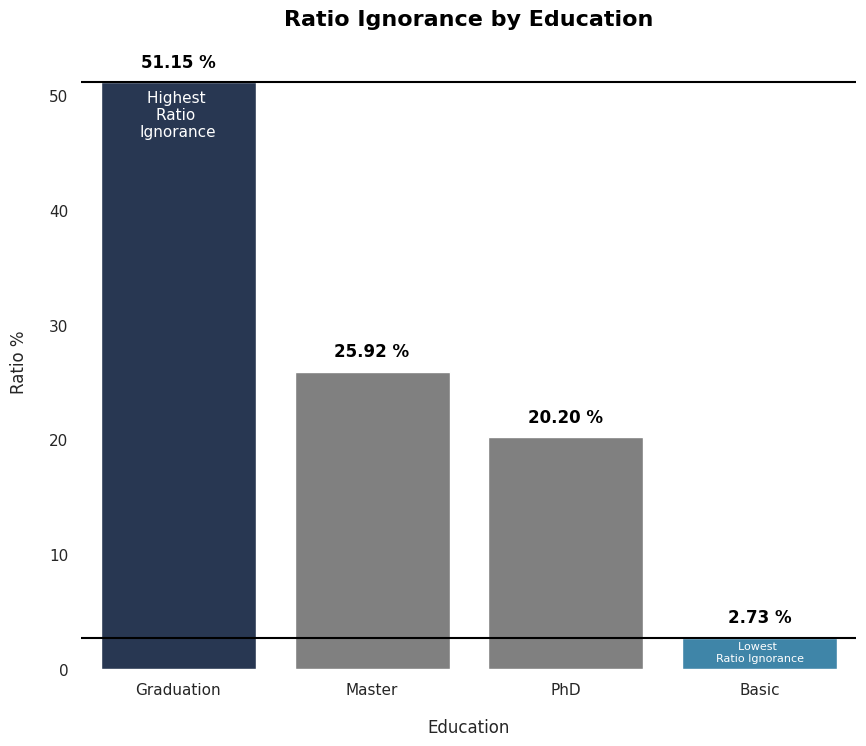

In [ ]:
# Identified Max and Min
max_index = edu['Ratio %'].idxmax()
min_index = edu['Ratio %'].idxmin()

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(edu))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Education', y = 'Ratio %', data = edu, palette = colors)

# # Modifying Subtitle
# sub_title = 'Ratio Ignorance by Education'
# plt.annotate(sub_title,
#              xy = (0.83, 1.15),
#              xycoords = 'axes fraction',
#              fontsize = 16,
#              color = 'black',
#              ha = 'right',
#              weight = 'bold')

# # Modifying Subtitle
# sub_title1 = 'Ratio Ignorance by Education'
# plt.annotate(sub_title1,
#              xy = (0.38, 1.1),
#              xycoords = 'axes fraction',
#              fontsize = 10,
#              color = '#2D8BBA',
#              ha = 'right',
#              weight = 'bold')

# Modifying Title
title = 'Ratio Ignorance by Education'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = edu['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
min_value = edu['Ratio %'][min_index]
plt.text(min_index,
         min_value - 2.2,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 8,
         color = 'white')

# Display values on top of each bar
for i in range(len(edu)):
    value = edu['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Education', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Marital Status

In [ ]:
mar = ignore.groupby('Marital_Status')['ID'].count().reset_index()
mar

,Marital_Status,ID
0,Divorced,184
1,Married,766
2,Single,378
3,Together,520
4,Widow,58


In [ ]:
total_count = mar['ID'].sum()
mar['Ratio %'] = (mar['ID'] / total_count) * 100

mar = mar.sort_values(by = 'Ratio %', ascending = False)
mar = mar.reset_index(drop = True)

round(mar, 2)

,Marital_Status,ID,Ratio %
0,Married,766,40.19
1,Together,520,27.28
2,Single,378,19.83
3,Divorced,184,9.65
4,Widow,58,3.04


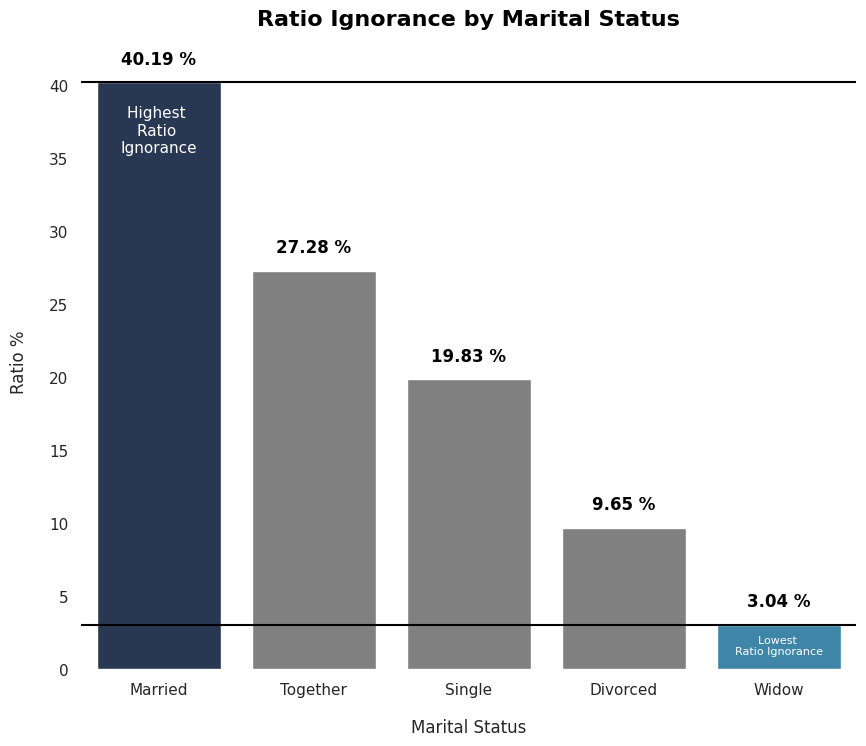

In [ ]:
# Identified Max and Min
max_index = mar['Ratio %'].idxmax()
min_index = mar['Ratio %'].idxmin()

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(mar))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Marital_Status', y = 'Ratio %', data = mar, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Marital Status'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = mar['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
min_value = mar['Ratio %'][min_index]
plt.text(min_index,
         min_value - 2.2,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 8,
         color = 'white')

# Display values on top of each bar
for i in range(len(mar)):
    value = mar['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Marital Status', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Kidhome

In [ ]:
kid = ignore.groupby('Kidhome')['ID'].count().reset_index()
kid

,Kidhome,ID
0,0,1071
1,1,789
2,2,46


In [ ]:
total_count = kid['ID'].sum()
kid['Ratio %'] = (kid['ID'] / total_count) * 100

kid = kid.sort_values(by = 'Ratio %', ascending = False)
kid = kid.reset_index(drop = True)

round(kid, 2)

,Kidhome,ID,Ratio %
0,0,1071,56.19
1,1,789,41.40
2,2,46,2.41


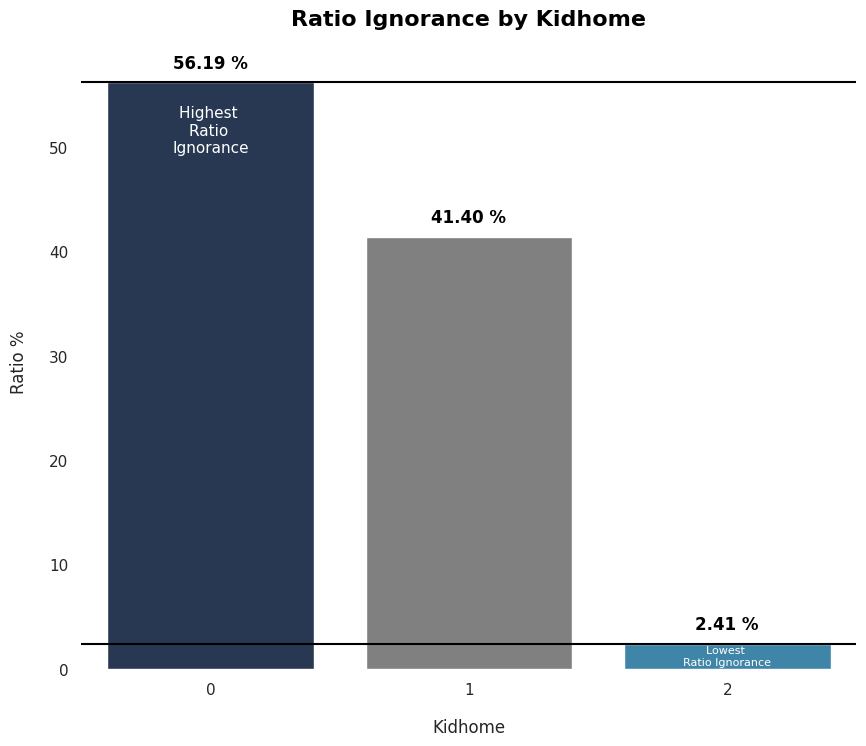

In [ ]:
# Identified Max and Min
max_index = kid['Ratio %'].idxmax()
min_index = kid['Ratio %'].idxmin()

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(kid))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Kidhome', y = 'Ratio %', data = kid, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Kidhome'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = kid['Ratio %'][max_index]
plt.text(max_index,
         max_value - 7,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
min_value = kid['Ratio %'][min_index]
plt.text(min_index,
         min_value - 2.2,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 8,
         color = 'white')

# Display values on top of each bar
for i in range(len(kid)):
    value = kid['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Kidhome', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Teenhome

In [ ]:
teen = ignore.groupby('Teenhome')['ID'].count().reset_index()
teen

,Teenhome,ID
0,0,921
1,1,938
2,2,47


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = teen['ID'].sum()
teen['Ratio %'] = (teen['ID'] / total_count) * 100

teen = teen.sort_values(by = 'Ratio %', ascending = False)
teen = teen.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(teen, 2)


,Teenhome,ID,Ratio %
0,1,938,49.21
1,0,921,48.32
2,2,47,2.47


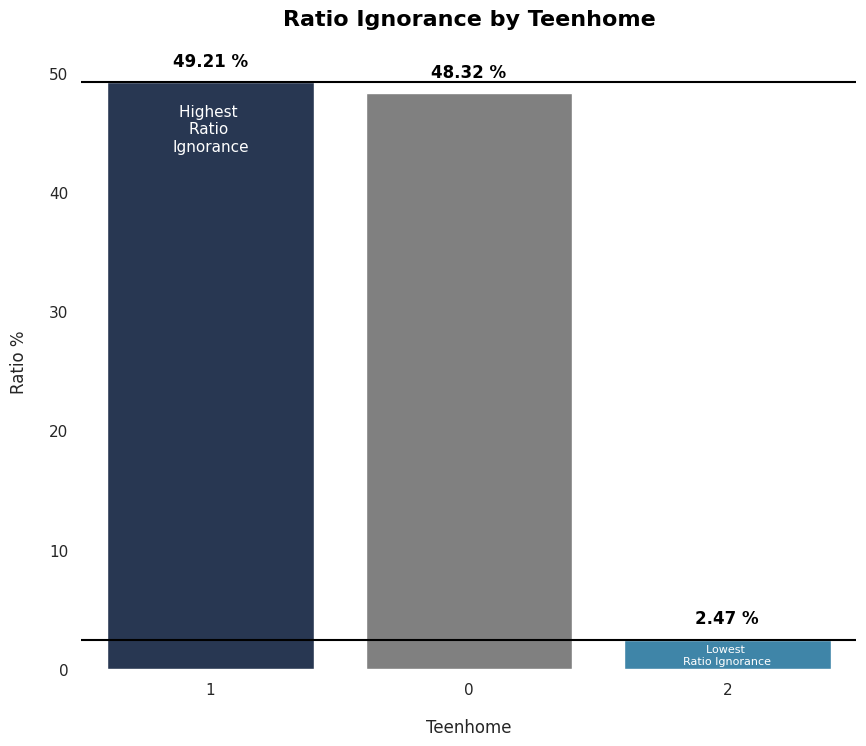

In [ ]:
# Identified Max and Min
max_index = teen['Ratio %'].idxmax()
min_index = teen['Ratio %'].idxmin()

# Set the order of 'Teenhome' categories
teen_order = [1, 0, 2]

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(teen))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Teenhome', y = 'Ratio %', data = teen, palette = colors, order = teen_order)

# Modifying Title
title = 'Ratio Ignorance by Teenhome'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = teen['Ratio %'][max_index]
plt.text(max_index,
         max_value - 6,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
min_value = teen['Ratio %'][min_index]
plt.text(min_index,
         min_value - 2.2,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 8,
         color = 'white')

# Display values on top of each bar
for i in range(len(teen)):
    value = teen['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Teenhome', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Complain

In [ ]:
comp = ignore.groupby('Complain')['ID'].count().reset_index()
comp

,Complain,ID
0,0,1888
1,1,18


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = comp['ID'].sum()
comp['Ratio %'] = (comp['ID'] / total_count) * 100

comp = comp.sort_values(by = 'Ratio %', ascending = False)
comp = comp.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(comp, 2)

,Complain,ID,Ratio %
0,0,1888,99.06
1,1,18,0.94


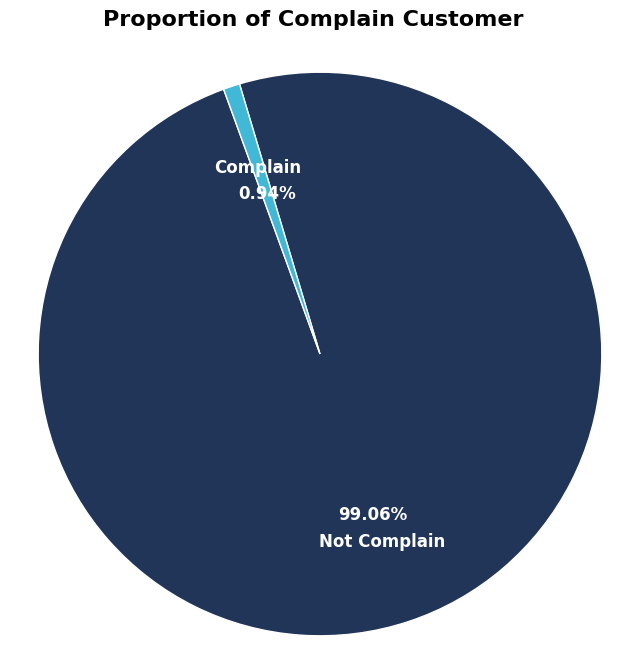

In [ ]:
# Replace numeric labels with corresponding strings
comp['Complain'] = comp['Complain'].replace({0: 'Not Complain', 1: 'Complain'})

# Setting Color Bar Plot
custom_color = {
    'Not Complain' : '#213559',
    'Complain'  : '#41B8D5'
}

# Plotting the pie chart
sns.set(style='whitegrid')
plt.figure(figsize=(8, 8))
pie, _, autotexts = plt.pie(comp['Ratio %'],
                            labels = comp['Complain'],
                            labeldistance = 0.7,
                            textprops = {'fontsize': 12, 'weight': 'bold', 'color' : 'white', 'ha': 'center', 'va': 'center'},
                            autopct = '%1.2f%%',
                            colors = [custom_color[class_] for class_ in comp['Complain']],
                            startangle = 110)


# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Modifying Title
title = 'Proportion of Complain Customer'
plt.title(title,
          fontsize = 16,
          loc = 'left',
          pad = 15,
          color = 'black',
          weight = 'bold',
          x = 0.15)

# Display the chart
plt.show()

### Ignorance by Ratio Acceptance

In [ ]:
df = df.groupby('Ratio_Acceptance')['ID'].count().reset_index()
df

,Ratio_Acceptance,ID
0,0.0,1777
1,20.0,325
2,40.0,83
3,60.0,44
4,80.0,11


In [ ]:
acc = ignore.groupby('Ratio_Acceptance')['ID'].count().reset_index()
acc

,Ratio_Acceptance,ID
0,0.0,1631
1,20.0,224
2,40.0,41
3,60.0,9
4,80.0,1


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = acc['ID'].sum()
acc['Ratio %'] = (acc['ID'] / total_count) * 100

acc = acc.sort_values(by='Ratio %', ascending = False)
acc = acc.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(acc, 2)


,Ratio_Acceptance,ID,Ratio %
0,0.0,1631,85.57
1,20.0,224,11.75
2,40.0,41,2.15
3,60.0,9,0.47
4,80.0,1,0.05


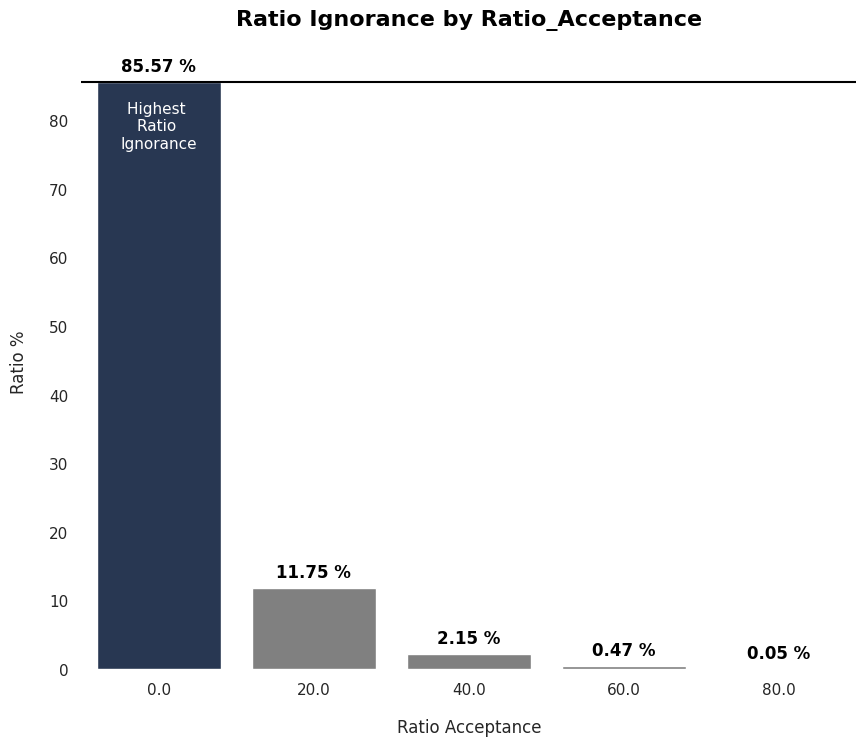

In [ ]:
# Identified Max and Min
max_index = acc['Ratio %'].idxmax()

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(acc))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Ratio_Acceptance', y = 'Ratio %', data = acc, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Ratio_Acceptance'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = acc['Ratio %'][max_index]
plt.text(max_index,
         max_value - 10,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(acc)):
    value = acc['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Ratio Acceptance', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Favorite Product

In [ ]:
fav = ignore.groupby('Favorite_Product')['ID'].count().reset_index()
fav

,Favorite_Product,ID
0,MntFishProducts,58
1,MntFruits,14
2,MntGoldProds,137
3,MntMeatProducts,365
4,MntSweetProducts,12
5,MntWines,1320


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = fav['ID'].sum()
fav['Ratio %'] = (fav['ID'] / total_count) * 100

fav = fav.sort_values(by = 'Ratio %', ascending = False)
fav = fav.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(fav, 2)

,Favorite_Product,ID,Ratio %
0,MntWines,1320,69.25
1,MntMeatProducts,365,19.15
2,MntGoldProds,137,7.19
3,MntFishProducts,58,3.04
4,MntFruits,14,0.73
5,MntSweetProducts,12,0.63


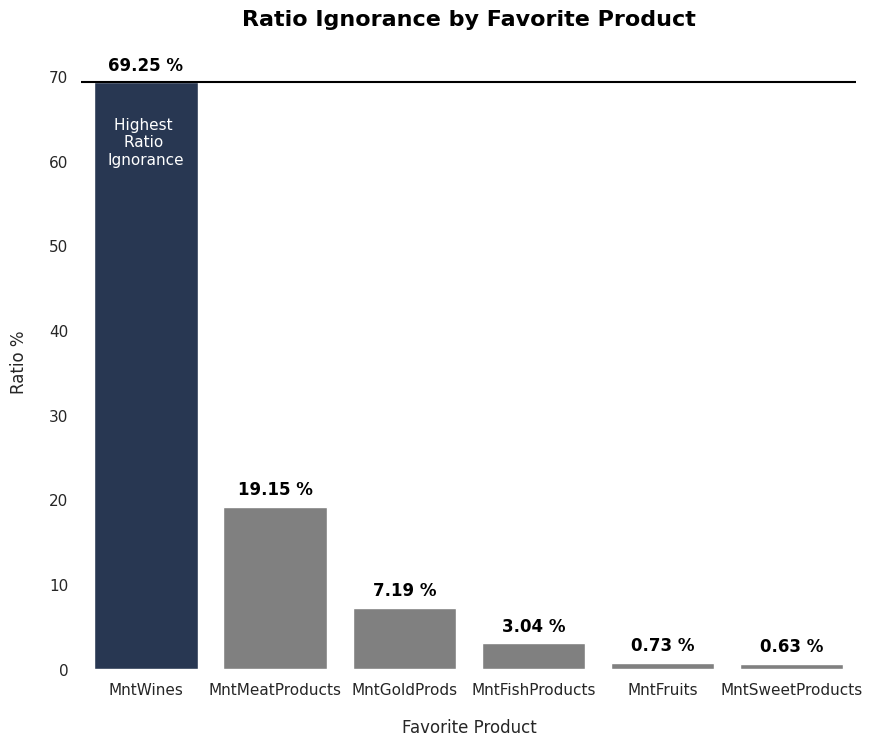

In [ ]:
# Identified Max and Min
max_index = fav['Ratio %'].idxmax()

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(fav))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Favorite_Product', y = 'Ratio %', data = fav, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Favorite Product'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = fav['Ratio %'][max_index]
plt.text(max_index,
         max_value - 10,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(fav)):
    value = fav['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Favorite Product', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by 2nd Favorite Product

In [ ]:
ignore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 1 to 2238
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          1906 non-null   int64         
 1   Year_Birth                  1906 non-null   int64         
 2   Education                   1906 non-null   object        
 3   Marital_Status              1906 non-null   object        
 4   Income                      1883 non-null   float64       
 5   Kidhome                     1906 non-null   int64         
 6   Teenhome                    1906 non-null   int64         
 7   Dt_Customer                 1906 non-null   datetime64[ns]
 8   Recency                     1906 non-null   int64         
 9   MntWines                    1906 non-null   int64         
 10  MntFruits                   1906 non-null   int64         
 11  MntMeatProducts             1906 non-null   int64       

In [ ]:
nfav = ignore.groupby('2nd_Favorite_Product')['ID'].count().reset_index()
nfav

,2nd_Favorite_Product,ID
0,MntFishProducts,95
1,MntFruits,39
2,MntGoldProds,278
3,MntMeatProducts,1136
4,MntSweetProducts,40
5,MntWines,318


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = nfav['ID'].sum()
nfav['Ratio %'] = (nfav['ID'] / total_count) * 100

nfav = nfav.sort_values(by = 'Ratio %', ascending = False)
nfav = nfav.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(nfav, 2)

,2nd_Favorite_Product,ID,Ratio %
0,MntMeatProducts,1136,59.60
1,MntWines,318,16.68
2,MntGoldProds,278,14.59
3,MntFishProducts,95,4.98
4,MntSweetProducts,40,2.10
5,MntFruits,39,2.05


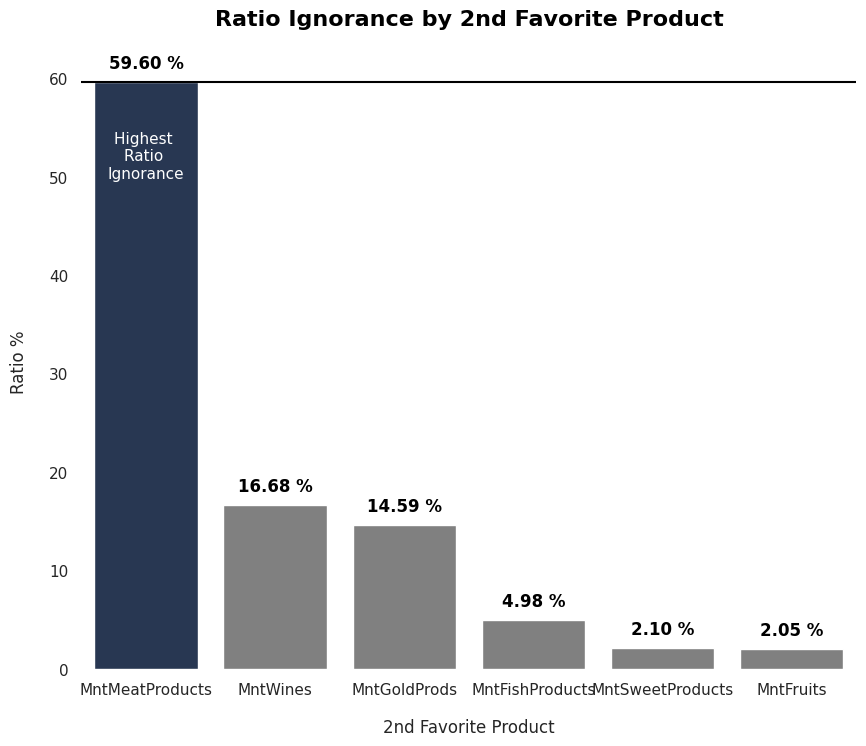

In [ ]:
# Identified Max and Min
max_index = nfav['Ratio %'].idxmax()

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(nfav))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = '2nd_Favorite_Product', y = 'Ratio %', data = nfav, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by 2nd Favorite Product'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = nfav['Ratio %'][max_index]
plt.text(max_index,
         max_value - 10,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(nfav)):
    value = nfav['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('2nd Favorite Product', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Membership Age

In [ ]:
# Filtering Ignorance
mem = df.copy()
mem = mem[mem['Membership_Age'] == 0]
mem

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product,Recency_Category
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,60,0.0,2,2,2,21,6,MntWines,MntMeatProducts,1 Months < R < 2 Months
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,30,0.0,2,4,2,48,5,MntMeatProducts,MntWines,R < 1 Month
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,33,0.0,8,6,5,407,15,MntWines,MntMeatProducts,R > 2 Months
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,64,20.0,1,0,1,36,13,MntWines,MntGoldProds,R > 2 Months
23,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,60,0.0,8,9,3,539,5,MntWines,MntMeatProducts,R < 1 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,44,20.0,13,6,3,652,27,MntWines,MntMeatProducts,R < 1 Month
2229,10084,1972,Graduation,Married,24434.0,2,0,2014-05-18,9,3,...,42,0.0,3,2,2,33,17,MntFishProducts,MntGoldProds,R < 1 Month
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,68,20.0,10,5,7,436,8,MntWines,MntMeatProducts,1 Months < R < 2 Months
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,33,20.0,5,13,1,1217,24,MntWines,MntMeatProducts,R > 2 Months


In [ ]:
mem = ignore.groupby('Membership_Age')['ID'].count().reset_index()

# Menambahkan teks 'years' ke setiap nilai pada kolom 'Membership_Age'
mem['Membership_Age'] = mem['Membership_Age'].map(lambda x: f'{x} years')
mem

,Membership_Age,ID
0,0 years,509
1,1 years,1035
2,2 years,362


In [ ]:
# Assuming you have a DataFrame named 'teen'
total_count = mem['ID'].sum()
mem['Ratio %'] = (mem['ID'] / total_count) * 100

# Round the DataFrame to 2 decimal places
round(mem, 2)

,Membership_Age,ID,Ratio %
0,0 years,509,26.71
1,1 years,1035,54.30
2,2 years,362,18.99


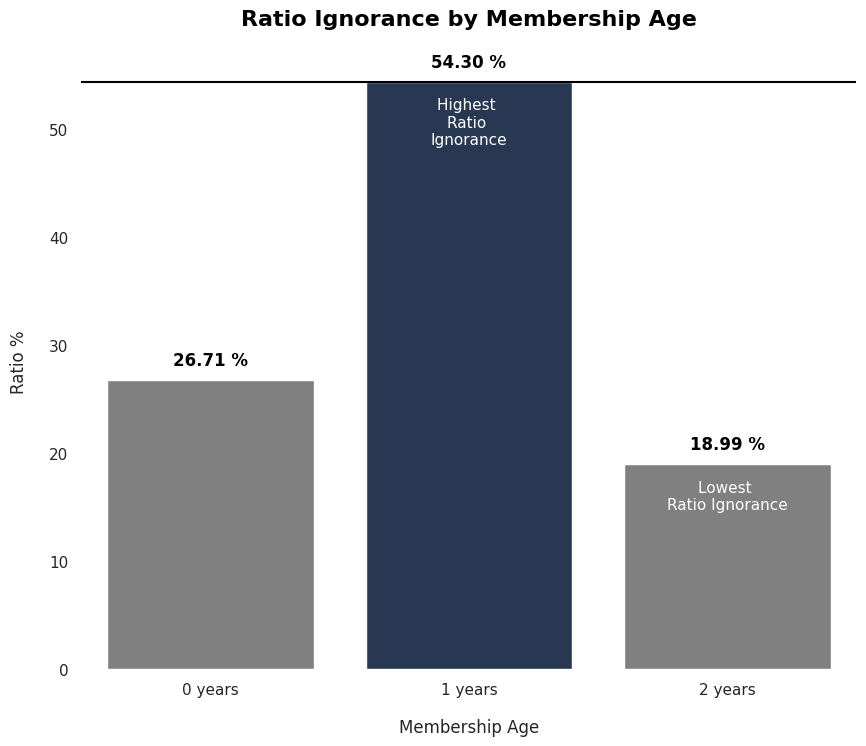

In [ ]:
# Identified Max and Min
max_index = mem['Ratio %'].idxmax()
min_index = mem['Ratio %'].idxmin()

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(mem))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Membership_Age', y = 'Ratio %', data = mem, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Membership Age'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = mem['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
plt.text(max_index,
         max_value - 6,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
min_value = mem['Ratio %'][min_index]
plt.text(min_index,
         min_value - 4.5,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(mem)):
    value = mem['Ratio %'].iloc[i]
    plt.text(i, value + 1, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Membership Age', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Frequency Offline Purchase

In [ ]:
off = ignore.groupby('Frequency_Offline_Purchase')['ID'].count().reset_index()
off

,Frequency_Offline_Purchase,ID
0,0,15
1,1,7
2,2,175
3,3,460
4,4,282
5,5,170
6,6,139
7,7,112
8,8,124
9,9,83


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = off['ID'].sum()
off['Ratio %'] = (off['ID'] / total_count) * 100

off = off.sort_values(by = 'Ratio %', ascending = False)
off = off.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(off, 2)

,Frequency_Offline_Purchase,ID,Ratio %
0,3,460,24.13
1,4,282,14.80
2,2,175,9.18
3,5,170,8.92
4,6,139,7.29
5,8,124,6.51
6,7,112,5.88
7,10,104,5.46
8,12,95,4.98
9,9,83,4.35


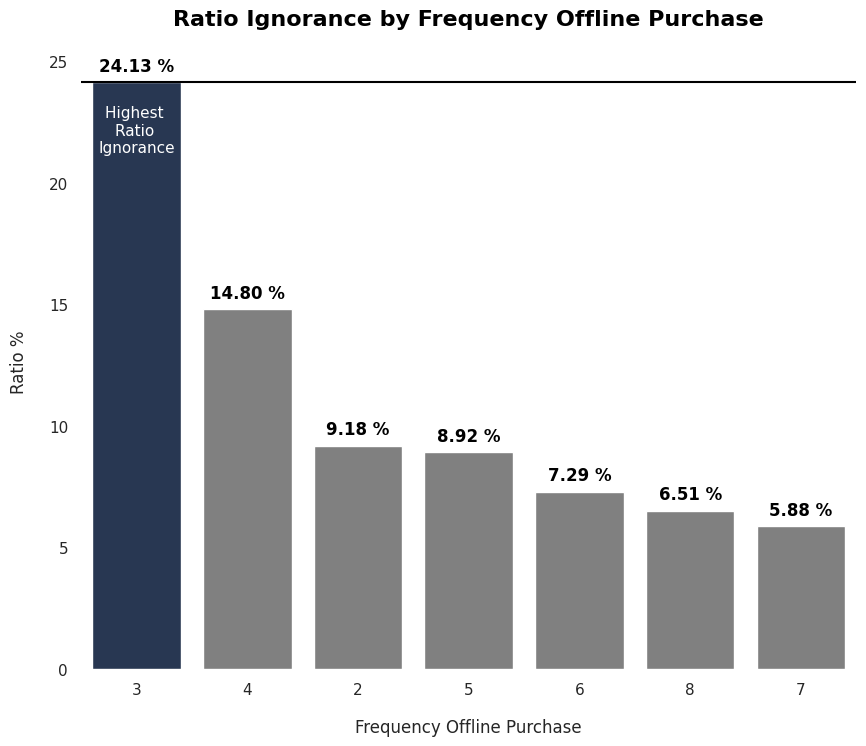

In [ ]:
# Identified Max and Min
max_index = off['Ratio %'].idxmax()

# Sort DataFrame by 'Ratio %' in descending order
off = off.sort_values(by = 'Ratio %', ascending=False)

# Select the top 5 rows
top_7_off = off.head(7)

# Set the order of 'Frequency Offline Purchase' categories
off_order = [3, 4, 2, 5, 6, 8, 7]

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(top_7_off))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Frequency_Offline_Purchase', y = 'Ratio %', data = top_7_off, palette = colors, order = off_order)

# Modifying Title
title = 'Ratio Ignorance by Frequency Offline Purchase'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = top_7_off['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = top_7_off['Ratio %'][max_index]
plt.text(max_index,
         max_value - 3,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(top_7_off)):
    value = top_7_off['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Frequency Offline Purchase', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Frequency Promo Purchase

In [ ]:
prom = ignore.groupby('Frequency_Promo_Purchase')['ID'].count().reset_index()
prom

,Frequency_Promo_Purchase,ID
0,0,30
1,1,810
2,2,449
3,3,259
4,4,163
5,5,78
6,6,49
7,7,32
8,8,13
9,9,5


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = prom['ID'].sum()
prom['Ratio %'] = (prom['ID'] / total_count) * 100

prom = prom.sort_values(by = 'Ratio %', ascending = False)
prom = prom.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(prom, 2)

,Frequency_Promo_Purchase,ID,Ratio %
0,1,810,42.50
1,2,449,23.56
2,3,259,13.59
3,4,163,8.55
4,5,78,4.09
5,6,49,2.57
6,7,32,1.68
7,0,30,1.57
8,8,13,0.68
9,15,7,0.37


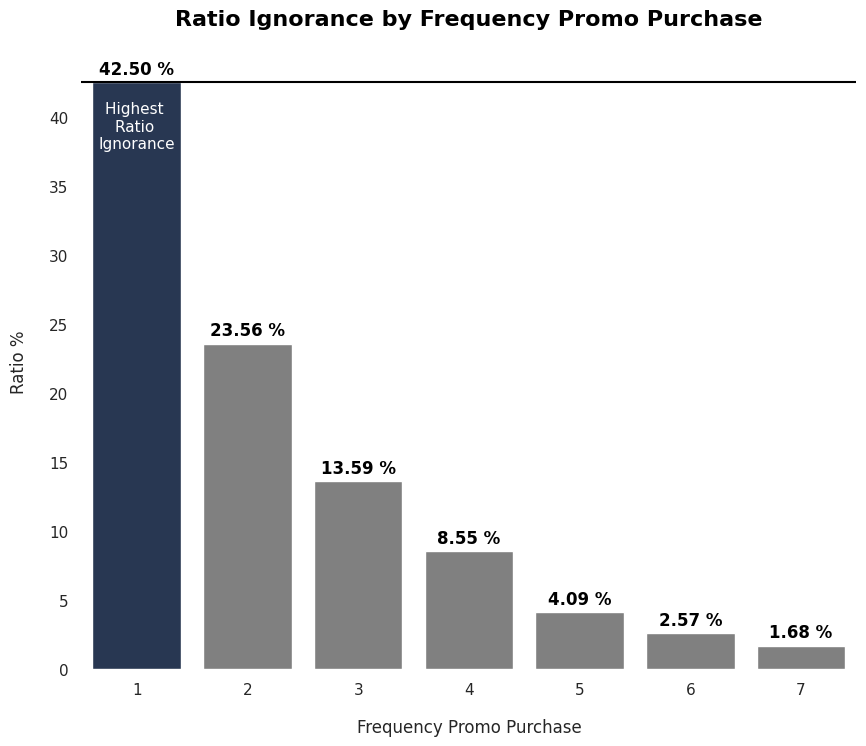

In [ ]:
# Identified Max and Min
max_index = prom['Ratio %'].idxmax()

# Select the top 5 rows
top_7_prom = prom.head(7)

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(top_7_prom))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Frequency_Promo_Purchase', y = 'Ratio %', data = top_7_prom, palette = colors)

# Modifying Title
title = 'Ratio Ignorance by Frequency Promo Purchase'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = top_7_prom['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = top_7_prom['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(top_7_prom)):
    value = top_7_prom['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Frequency Promo Purchase', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Frequency Online Purchase

In [ ]:
on = ignore.groupby('Frequency_Online_Purchase')['ID'].count().reset_index()
on

,Frequency_Online_Purchase,ID
0,0,37
1,1,262
2,2,239
3,3,191
4,4,110
5,5,106
6,6,105
7,7,110
8,8,130
9,9,123


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = on['ID'].sum()
on['Ratio %'] = (on['ID'] / total_count) * 100

on = on.sort_values(by = 'Ratio %', ascending = False)
on = on.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(on, 2)

,Frequency_Online_Purchase,ID,Ratio %
0,1,262,13.75
1,2,239,12.54
2,3,191,10.02
3,8,130,6.82
4,10,125,6.56
5,9,123,6.45
6,4,110,5.77
7,7,110,5.77
8,5,106,5.56
9,6,105,5.51


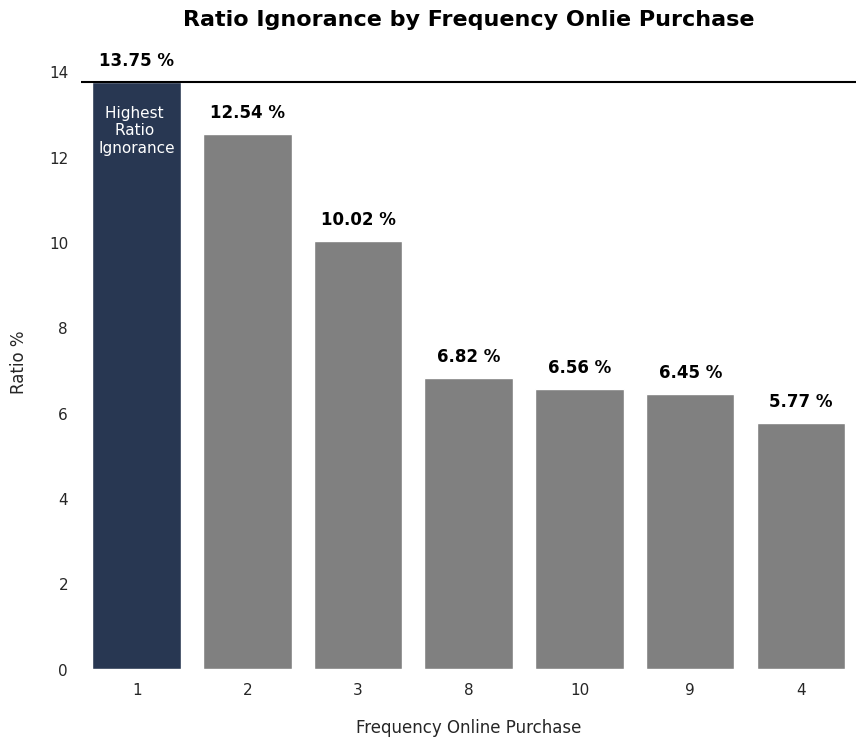

In [ ]:
# Identified Max and Min
max_index = on['Ratio %'].idxmax()

# Select the top 5 rows
top_7_on = on.head(7)

# Set the order of 'Frequency Online Purchase' categories
on_order = [1, 2, 3, 8, 10, 9, 4]

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(top_7_on))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Frequency_Online_Purchase', y = 'Ratio %', data = top_7_on, palette = colors, order = on_order)

# Modifying Title
title = 'Ratio Ignorance by Frequency Onlie Purchase'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = top_7_on['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = top_7_on['Ratio %'][max_index]
plt.text(max_index,
         max_value - 1.7,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(top_7_on)):
    value = top_7_on['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Frequency Online Purchase', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Customer Age

In [ ]:
# Create Age Category Column
def age_cat(age):
    if age <= 25:
        return 'Remaja'
    elif age <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'
ignore['Age_Category'] = ignore['Customer_Age'].apply(age_cat)

In [ ]:
cca = ignore.groupby('Age_Category')['ID'].count().reset_index()
cca

,Age_Category,ID
0,Dewasa,963
1,Lansia,867
2,Remaja,76


In [ ]:
ca = ignore.groupby('Customer_Age')['ID'].count().reset_index()
ca = ca.sort_values(by = 'ID', ascending = False)
ca = ca.reset_index(drop = True)
ca

,Customer_Age,ID
0,38,81
1,36,74
2,43,73
3,39,72
4,49,68
5,42,65
6,41,63
7,44,61
8,45,61
9,40,58


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = cca['ID'].sum()
cca['Ratio %'] = (cca['ID'] / total_count) * 100

cca = cca.sort_values(by = 'Ratio %', ascending = False)
cca = cca.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(cca, 2)

,Age_Category,ID,Ratio %
0,Dewasa,963,50.52
1,Lansia,867,45.49
2,Remaja,76,3.99


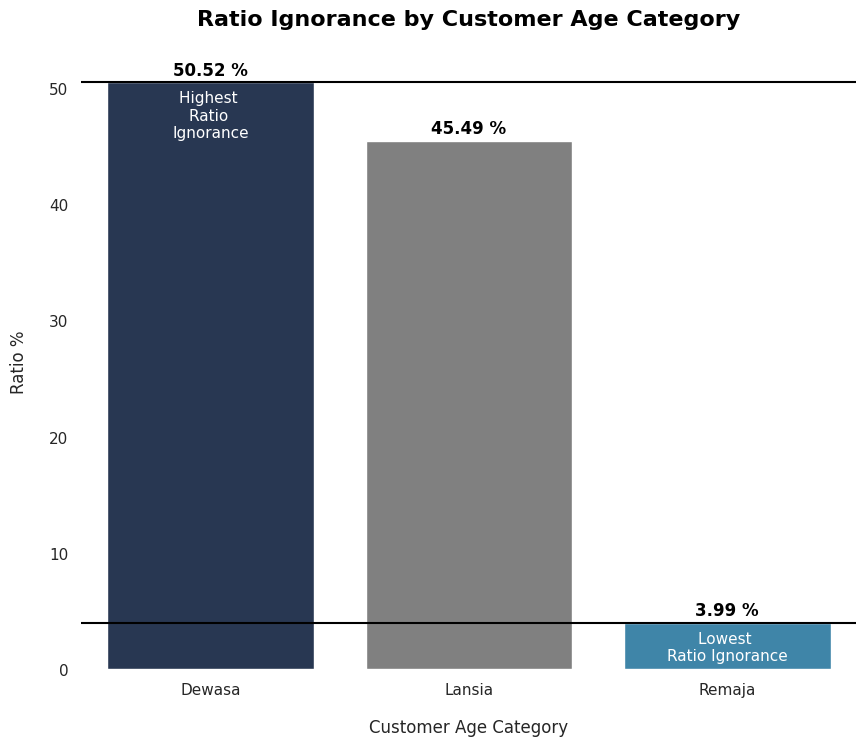

In [ ]:
# Identified Max and Min
max_index = cca['Ratio %'].idxmax()
min_index = cca['Ratio %'].idxmin()

# Set the order of 'Frequency Online Purchase' categories
cca_order = ['Dewasa', 'Lansia', 'Remaja']

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(cca))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Age_Category', y = 'Ratio %', data = cca, palette = colors, order = cca_order)

# Modifying Title
title = 'Ratio Ignorance by Customer Age Category'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = cca['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = cca['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
min_value = cca['Ratio %'][min_index]
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = cca['Ratio %'][min_index]
plt.text(min_index,
         min_value - 3.5,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(cca)):
    value = cca['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Customer Age Category', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Recency

In [ ]:
# Create Age Category Column
def rec_cat(rec):
    if rec <= 30:
        return 'R < 1 Month'
    elif rec <= 60:
        return '1 Months < R < 2 Months'
    else:
        return 'R > 2 Months'
ignore['Recency_Category'] = ignore['Recency'].apply(rec_cat)

In [ ]:
# Create Age Category Column
def rec_cat(rec):
    if rec <= 30:
        return 'R < 1 Month'
    elif rec <= 60:
        return '1 Months < R < 2 Months'
    else:
        return 'R > 2 Months'
df['Recency_Category'] = df['Recency'].apply(rec_cat)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2240 non-null   int64         
 1   Year_Birth                  2240 non-null   int64         
 2   Education                   2240 non-null   object        
 3   Marital_Status              2240 non-null   object        
 4   Income                      2216 non-null   float64       
 5   Kidhome                     2240 non-null   int64         
 6   Teenhome                    2240 non-null   int64         
 7   Dt_Customer                 2240 non-null   datetime64[ns]
 8   Recency                     2240 non-null   int64         
 9   MntWines                    2240 non-null   int64         
 10  MntFruits                   2240 non-null   int64         
 11  MntMeatProducts             2240 non-null   int64       

In [ ]:
# Filtering Ignorance
rec = df.copy()
rec = df[df['Recency_Category'] != 'R > 2 Months']
rec

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product,Recency_Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,57,0.0,18,4,3,1529,88,MntWines,MntMeatProducts,1 Months < R < 2 Months
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,60,0.0,2,2,2,21,6,MntWines,MntMeatProducts,1 Months < R < 2 Months
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,49,0.0,10,10,1,734,42,MntWines,MntMeatProducts,R < 1 Month
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,30,0.0,2,4,2,48,5,MntMeatProducts,MntWines,R < 1 Month
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,47,0.0,10,10,2,702,14,MntWines,MntMeatProducts,R < 1 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,37,0.0,4,3,4,50,12,MntMeatProducts,MntFruits,R < 1 Month
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,47,0.0,12,4,2,1094,247,MntWines,MntGoldProds,1 Months < R < 2 Months
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,68,20.0,10,5,7,436,8,MntWines,MntMeatProducts,1 Months < R < 2 Months
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,58,0.0,11,10,2,782,61,MntWines,MntMeatProducts,R < 1 Month


In [ ]:
# Filtering Ignorance
ignore = df.copy()
ignore = ignore[ignore['Ratio_Acceptance'] != 0.0]
ignore

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,64,20.0,1,0,1,36,13,MntWines,MntGoldProds
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,2,68,40.0,13,12,1,1270,45,MntWines,MntMeatProducts
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,1,65,20.0,15,9,2,1606,176,MntWines,MntMeatProducts
22,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,...,2,65,20.0,5,9,3,953,19,MntWines,MntMeatProducts
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,1,49,20.0,15,10,1,1672,0,MntMeatProducts,MntWines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,44,20.0,13,6,3,652,27,MntWines,MntMeatProducts
2228,8720,1978,Master,Together,NaN,0,0,2012-08-12,53,32,...,2,36,20.0,0,1,0,1657,22,MntMeatProducts,MntWines
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,1,30,20.0,4,2,3,61,23,MntMeatProducts,MntWines
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,68,20.0,10,5,7,436,8,MntWines,MntMeatProducts


In [ ]:
# Filtering Ignorance
rec = ignore.copy()
rec = rec[rec['Recency_Category'] != 'R > 2 Months']
rec

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,2,68,40.0,13,12,1,1270,45,MntWines,MntMeatProducts
32,5710,1970,Graduation,Together,40548.0,0,1,2012-10-10,31,110,...,2,44,20.0,3,4,2,117,3,MntWines,MntMeatProducts
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,1,71,20.0,17,5,2,860,42,MntWines,MntMeatProducts
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,...,0,37,40.0,13,7,1,1376,241,MntMeatProducts,MntWines
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,...,2,59,20.0,13,13,1,1767,190,MntWines,MntMeatProducts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,1,60,20.0,9,4,7,348,152,MntWines,MntGoldProds
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,32,40.0,9,11,1,1358,80,MntWines,MntMeatProducts
2224,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,44,20.0,13,6,3,652,27,MntWines,MntMeatProducts
2228,8720,1978,Master,Together,NaN,0,0,2012-08-12,53,32,...,2,36,20.0,0,1,0,1657,22,MntMeatProducts,MntWines


In [ ]:
# Filtering Ignorance
mem = rec.copy()
mem = mem[mem['Membership_Age'] == 0]
mem


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Membership_Age,Customer_Age,Ratio_Acceptance,Frequency_Online_Purchase,Frequency_Offline_Purchase,Frequency_Promo_Purchase,Consumable_Expenses,Non_Consumable_Expenses,Favorite_Product,2nd_Favorite_Product
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,...,0,37,40.0,13,7,1,1376,241,MntMeatProducts,MntWines
67,9369,1979,Master,Single,88194.0,0,1,2014-03-19,19,688,...,0,35,40.0,21,10,1,1236,38,MntWines,MntMeatProducts
87,4452,1957,Graduation,Single,50388.0,0,1,2014-05-28,3,292,...,0,57,40.0,7,6,4,338,34,MntWines,MntMeatProducts
112,3267,1963,Master,Together,57288.0,0,1,2014-06-25,27,527,...,0,51,20.0,9,8,3,548,60,MntWines,MntGoldProds
116,1592,1970,Graduation,Married,90765.0,0,0,2014-01-24,25,547,...,0,44,40.0,10,5,0,1691,33,MntMeatProducts,MntWines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2829,1955,Graduation,Married,65210.0,0,1,2014-03-10,25,626,...,0,59,40.0,12,8,2,703,28,MntWines,MntMeatProducts
2186,2666,1972,Master,Married,76234.0,0,1,2014-02-06,21,519,...,0,42,20.0,11,11,1,866,41,MntWines,MntMeatProducts
2187,5721,1956,PhD,Married,84117.0,0,0,2014-05-11,60,611,...,0,58,20.0,17,6,1,1540,26,MntMeatProducts,MntWines
2224,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,44,20.0,13,6,3,652,27,MntWines,MntMeatProducts


In [ ]:
rec = df.groupby('Recency_Category')['ID'].count().reset_index()
rec

,Recency_Category,ID
0,1 Months < R < 2 Months,654
1,R < 1 Month,724
2,R > 2 Months,862


In [ ]:
rec = ignore.groupby('Recency_Category')['ID'].count().reset_index()
rec

,Recency_Category,ID
0,1 Months < R < 2 Months,565
1,R < 1 Month,551
2,R > 2 Months,790


In [ ]:
re = ignore.groupby('Recency')['ID'].count().reset_index()
re = re.sort_values(by = 'ID', ascending = False)
re = re.reset_index(drop = True)
re

,Recency,ID
0,56,31
1,92,30
2,49,29
3,54,28
4,46,28
...,...,...
95,15,11
96,35,10
97,5,9
98,44,8


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'teen'
total_count = rec['ID'].sum()
rec['Ratio %'] = (rec['ID'] / total_count) * 100

rec = rec.sort_values(by = 'Ratio %', ascending = False)
rec = rec.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(rec, 2)

,Recency_Category,ID,Ratio %
0,R > 2 Months,790,41.45
1,1 Months < R < 2 Months,565,29.64
2,R < 1 Month,551,28.91


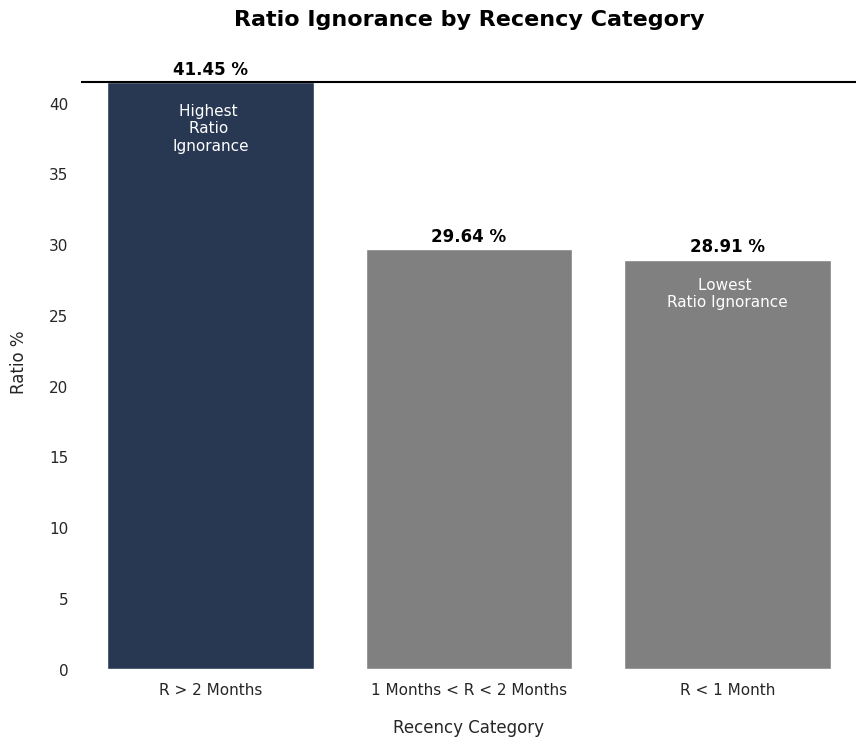

In [ ]:
# Identified Max and Min
max_index = rec['Ratio %'].idxmax()
min_index = rec['Ratio %'].idxmin()

# Set the order of 'Frequency Online Purchase' categories
rec_order = ['R > 2 Months', '1 Months < R < 2 Months', 'R < 1 Month']

# Setting Color Bar Plot
colors = ['grey' if i != max_index else '#213559' for i in range(len(rec))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Recency_Category', y = 'Ratio %', data = rec, palette = colors, order = rec_order)

# Modifying Title
title = 'Ratio Ignorance by Recency Category'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = rec['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
min_value = rec['Ratio %'][min_index]
plt.text(min_index,
         min_value - 3.5,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(rec)):
    value = rec['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Recency Category', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Consumable Expenses

In [ ]:
# Create Income Category Column
def ce_cat(ce):
    if ce <= ignore['Consumable_Expenses'].quantile(0.5):
        return 'Low Expanses'
    elif ce <= ignore['Consumable_Expenses'].quantile(0.75):
        return 'Medium Expenses'
    else:
        return 'High Expenses'
ignore['Consumable_Expenses_Category'] = ignore['Consumable_Expenses'].apply(ce_cat)


In [ ]:
cec = ignore.groupby('Consumable_Expenses_Category')['ID'].count().reset_index()
cec

,Consumable_Expenses_Category,ID
0,High Expenses,477
1,Low Expanses,953
2,Medium Expenses,476


In [ ]:
ce = ignore.groupby('Consumable_Expenses')['ID'].count().reset_index()
ce = ce.sort_values(by = 'ID', ascending = False)
ce = ce.reset_index(drop = True)
ce

,Consumable_Expenses,ID
0,39,29
1,40,27
2,19,23
3,16,23
4,41,22
...,...,...
773,762,1
774,757,1
775,754,1
776,751,1


In [ ]:
# Assuming you have a DataFrame named 'teen'
total_count = cec['ID'].sum()
cec['Ratio %'] = (cec['ID'] / total_count) * 100

cec = cec.sort_values(by = 'Ratio %', ascending = False)
cec = cec.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(cec, 2)

,Consumable_Expenses_Category,ID,Ratio %
0,Low Expanses,953,50.00
1,High Expenses,477,25.03
2,Medium Expenses,476,24.97


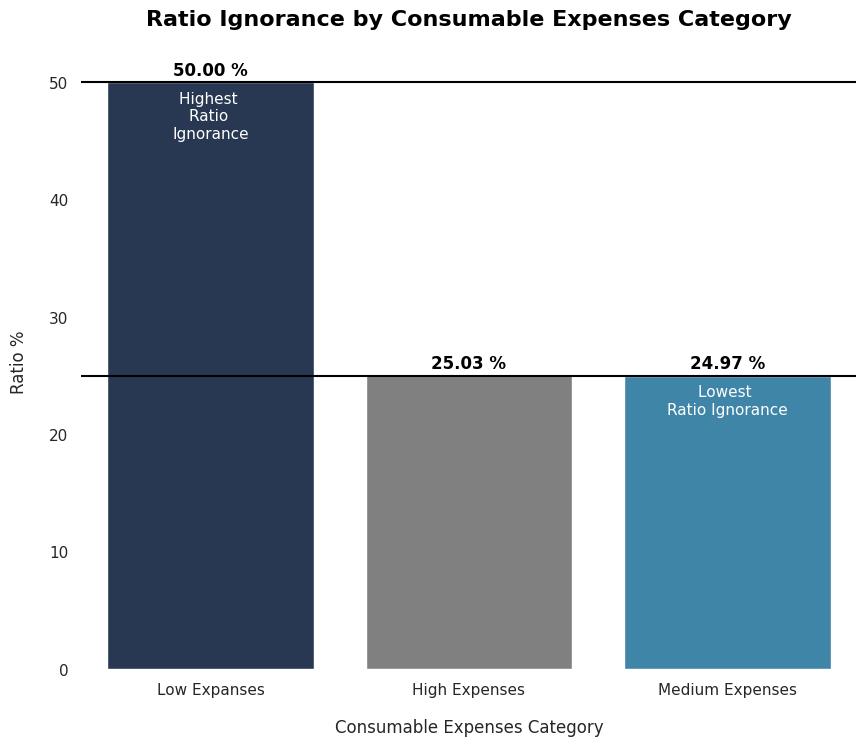

In [ ]:
# Identified Max and Min
max_index = cec['Ratio %'].idxmax()
min_index = cec['Ratio %'].idxmin()

# Set the order of 'Frequency Online Purchase' categories
cec_order = ['Low Expanses', 'High Expenses', 'Medium Expenses']

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(cec))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Consumable_Expenses_Category', y = 'Ratio %', data = cec, palette = colors, order = cec_order)

# Modifying Title
title = 'Ratio Ignorance by Consumable Expenses Category'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = cec['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = cec['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
min_value = cec['Ratio %'][min_index]
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = cec['Ratio %'][min_index]
plt.text(min_index,
         min_value - 3.5,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(cec)):
    value = cec['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Consumable Expenses Category', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### Ignorance by Non Consumable Expenses

In [ ]:
# Create Income Category Column
def ne_cat(ne):
    if ne <= ignore['Non_Consumable_Expenses'].quantile(0.5):
        return 'Low Expanses'
    elif ne <= ignore['Non_Consumable_Expenses'].quantile(0.75):
        return 'Medium Expenses'
    else:
        return 'High Expenses'
ignore['Non_Consumable_Expenses_Category'] = ignore['Non_Consumable_Expenses'].apply(ne_cat)


In [ ]:
nec = ignore.groupby('Non_Consumable_Expenses_Category')['ID'].count().reset_index()
nec

,Non_Consumable_Expenses_Category,ID
0,High Expenses,471
1,Low Expanses,966
2,Medium Expenses,469


In [ ]:
ne = ignore.groupby('Non_Consumable_Expenses')['ID'].count().reset_index()
ne = ne.sort_values(by = 'ID', ascending = False)
ne = ne.reset_index(drop = True)
ne

,Non_Consumable_Expenses,ID
0,1,73
1,4,67
2,3,65
3,5,63
4,2,60
...,...,...
193,123,1
194,166,1
195,197,1
196,199,1


In [ ]:
# Assuming you have a DataFrame named 'teen'
total_count = nec['ID'].sum()
nec['Ratio %'] = (nec['ID'] / total_count) * 100

nec = nec.sort_values(by = 'Ratio %', ascending = False)
nec = nec.reset_index(drop = True)

# Round the DataFrame to 2 decimal places
round(nec, 2)

,Non_Consumable_Expenses_Category,ID,Ratio %
0,Low Expanses,966,50.68
1,High Expenses,471,24.71
2,Medium Expenses,469,24.61


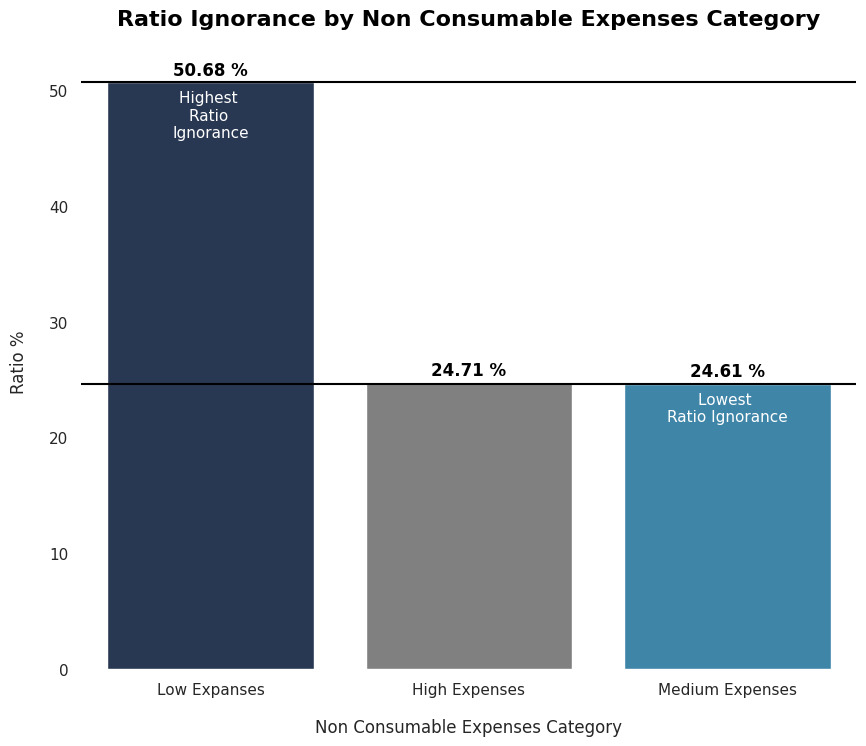

In [ ]:
# Identified Max and Min
max_index = nec['Ratio %'].idxmax()
min_index = nec['Ratio %'].idxmin()

# Set the order of 'Frequency Online Purchase' categories
nec_order = ['Low Expanses', 'High Expenses', 'Medium Expenses']

# Setting Color Bar Plot
colors = ['grey' if i != max_index and i != min_index else ('#213559' if i == max_index else '#2D8BBA') for i in range(len(nec))]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))
plot_sns = sns.barplot(x = 'Non_Consumable_Expenses_Category', y = 'Ratio %', data = nec, palette = colors, order = nec_order)

# Modifying Title
title = 'Ratio Ignorance by Non Consumable Expenses Category'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 20,
          color = 'black',
          weight = 'bold')

# Including Label
# Including Label Max
max_value = nec['Ratio %'][max_index]
plt.axhline(y = max_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = nec['Ratio %'][max_index]
plt.text(max_index,
         max_value - 5,
         f'Highest \nRatio \nIgnorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Including Label Min
min_value = nec['Ratio %'][min_index]
plt.axhline(y = min_value, color = 'black', ls = 'solid', lw = 1.5)
max_value = nec['Ratio %'][min_index]
plt.text(min_index,
         min_value - 3.5,
         f'Lowest \nRatio Ignorance',
         ha = 'center',
         va = 'bottom',
         fontsize = 11,
         color = 'white')

# Display values on top of each bar
for i in range(len(nec)):
    value = nec['Ratio %'].iloc[i]
    plt.text(i, value + 0.3, f'{value:.2f} %', ha = 'center', va = 'bottom', fontsize = 12, color = 'black', weight = 'bold')

# Modifying Label
plt.xlabel('Non Consumable Expenses Category', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()
